In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('..\..\..\listings.csv') #Importing Dataset
        
data_Numeric = pd.DataFrame(data[["id","host_total_listings_count","zipcode","latitude","longitude","accommodates","bathrooms","bedrooms","beds","price","weekly_price","monthly_price","security_deposit","cleaning_fee","guests_included","extra_people","minimum_nights","maximum_nights","availability_30","availability_90","availability_365","number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month"]])

for var in data_Numeric:
    if(data_Numeric[var].dtypes == "object"):
        data_Numeric[var] = data_Numeric[var].str.replace(',', '').str.replace('$', '')
        data_Numeric[var] = data_Numeric[var].apply(pd.to_numeric,errors='coerce')

from sklearn.impute import SimpleImputer

change = SimpleImputer(missing_values=np.nan, strategy ='mean')
data_Numeric_changed = pd.DataFrame(change.fit_transform(data_Numeric))
data_Numeric_changed.columns = data_Numeric.columns
data_Numeric_changed.index = data_Numeric.index

price_changed = pd.DataFrame(data_Numeric_changed["price"])
reviewscore_changed = pd.DataFrame(data_Numeric_changed["review_scores_rating"])

useless = ["zipcode","latitude","longitude"]
data_Numeric_changed=data_Numeric_changed.drop(axis=1,columns=useless)

data_Numeric_changed.head()

,id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,241032.0,3.0,4.0,1.0,1.0,1.0,85.0,788.481832,2613.33619,287.610397,...,346.0,207.0,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,4.070000
1,953595.0,6.0,4.0,1.0,1.0,1.0,150.0,1000.000000,3000.00000,100.000000,...,291.0,43.0,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.480000
2,3308979.0,2.0,11.0,4.5,5.0,7.0,975.0,788.481832,2613.33619,1000.000000,...,220.0,20.0,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.150000
3,7421966.0,1.0,3.0,1.0,0.0,2.0,100.0,650.000000,2300.00000,287.610397,...,143.0,0.0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.078919
4,278830.0,2.0,6.0,2.0,3.0,3.0,450.0,788.481832,2613.33619,700.000000,...,365.0,38.0,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.890000


In [3]:
from sklearn.model_selection import train_test_split

data_Numeric_Train, data_Numeric_test,price_Train, price_test,reviewscore_Train, reviewscore_test = train_test_split(data_Numeric_changed,price_changed,reviewscore_changed,test_size = 0.15)

print("Train Set :", data_Numeric_Train.shape, price_Train.shape, reviewscore_Train.shape)
print("Test Set  :", data_Numeric_test.shape, price_test.shape, reviewscore_test.shape)

Train Set : (3245, 27) (3245, 1) (3245, 1)
Test Set  : (573, 27) (573, 1) (573, 1)


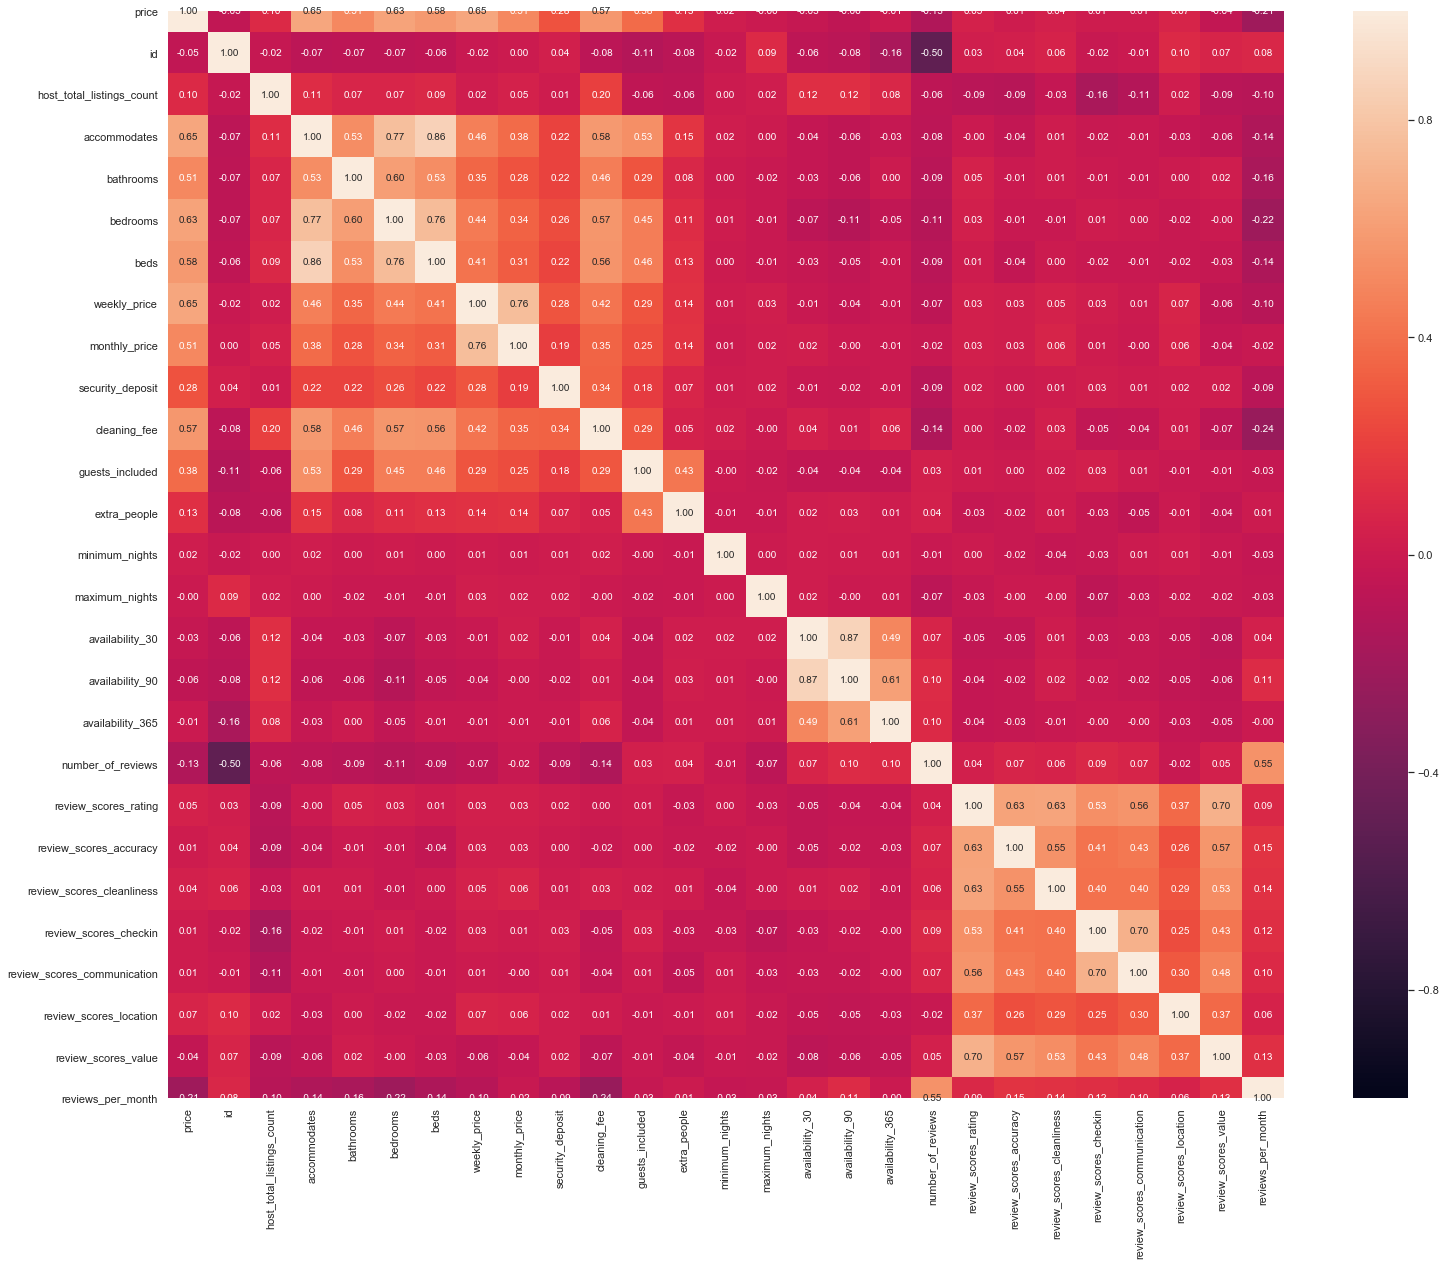

In [4]:
# Correlation between Response and the Predictors
trainDF = pd.concat([price_Train, data_Numeric_Train.reindex(index=data_Numeric_Train.index)], sort = False)

f, axes = plt.subplots(1, 1, figsize=(25, 20))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [5]:
count = 0
highrelation = []
for var in trainDF.corr():
    if(trainDF.corr()['price'][count] > 0.3):
        print("Variables that are Highly Related:",var)
        if(var != "price"):
            highrelation.append(var) 
    count+=1
    
index = 0
Multi_High_Related_Train = {} 
Multi_High_Related_Test = {}

for var in highrelation:
    Multi_High_Related_Train[index]={}  
    Multi_High_Related_Test[index]={} 
    index+=1

index = 0
index2 = 0
for var in Multi_High_Related_Train:
    for var2 in Multi_High_Related_Train:
        Multi_High_Related_Train[index][index2]={}
        Multi_High_Related_Test[index][index2]={}
        index2+=1
    index2=0
    index+=1

index = 0
index2 = 0
index3 = 0

for var in highrelation:
    for var2 in highrelation:
            for var3 in highrelation:
                    Multi_High_Related_Train[index][index2][index3] = {}
                    Multi_High_Related_Test[index][index2][index3] = {}
                    index3+=1
            index2+=1
            index3=0
    index+=1
    index2=0


index = 0
index2 = 0
index3 = 0
index4 = 0

for var in highrelation:
    for var2 in highrelation:
        for var3 in highrelation:
                for var4 in highrelation:
                        Multi_High_Related_Train[index][index2][index3][index4] = {}
                        Multi_High_Related_Test[index][index2][index3][index4] = {}
                        index4+=1
                index4=0
                index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1


index = 0
index2 = 0
index3 = 0
index4 = 0
index5 = 0

for var in highrelation:
    for var2 in highrelation:
        if(var2!=var):
            for var3 in highrelation:
                if(var3 != var2 and var3 != var):
                    for var4 in highrelation:
                        if(var4!=var3 and var4 != var2 and var4 != var):
                            for var5 in highrelation:
                                if(var5!=var4 and var5!=var3 and var5!=var2 and var5!=var):
                                    Multi_High_Related_Train[index][index2][index3][index4][index5] = pd.DataFrame(data_Numeric_Train[[var,var2,var3,var4,var5]])
                                    Multi_High_Related_Test[index][index2][index3][index4][index5] = pd.DataFrame(data_Numeric_test[[var,var2,var3,var4,var5]])
                                    index5+=1
                            index5=0
                            index4+=1
                    index4=0
                    index3+=1
            index3=0
            index2+=1
    index2=0
    index+=1
    

Variables that are Highly Related: price
Variables that are Highly Related: accommodates
Variables that are Highly Related: bathrooms
Variables that are Highly Related: bedrooms
Variables that are Highly Related: beds
Variables that are Highly Related: weekly_price
Variables that are Highly Related: monthly_price
Variables that are Highly Related: cleaning_fee
Variables that are Highly Related: guests_included


In [6]:
from sklearn.linear_model import LinearRegression

index = 0
linreg = {}

for var in Multi_High_Related_Train:
        linreg[index]={} 
        index+=1
        
index = 0
index2 = 0
for var in Multi_High_Related_Train:
    for var2 in Multi_High_Related_Train[var]:
            linreg[index][index2]={}
            index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
for var in Multi_High_Related_Train:
    for var2 in Multi_High_Related_Train[var]:
        for var3 in Multi_High_Related_Train[var][var2]:
                linreg[index][index2][index3]={}
                index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
index4 = 0

for var in Multi_High_Related_Train:
    for var2 in Multi_High_Related_Train[var]:
        for var3 in Multi_High_Related_Train[var][var2]:
            for var4 in Multi_High_Related_Train[var][var2][var3]:
                linreg[index][index2][index3][index4] = {}
                index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1

index = 0
index2 = 0
index3 = 0
index4 = 0
index5 = 0

for var in Multi_High_Related_Train:
    for var2 in Multi_High_Related_Train[var]:
        for var3 in Multi_High_Related_Train[var][var2]:
            for var4 in Multi_High_Related_Train[var][var2][var3]:
                for var5 in Multi_High_Related_Train[var][var2][var3][var4]:
                    linreg[index][index2][index3][index4][index5] = LinearRegression()
                    linreg[index][index2][index3][index4][index5].fit(Multi_High_Related_Train[index][index2][index3][index4][index5], price_Train)
                    index5+=1
                index5=0
                index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1                
    index2=0
    index+=1

In [7]:
index = 0
price_train_pred = {}
price_test_pred = {}

for var in linreg:
    if(index < len(linreg)):
        price_train_pred[index]={} 
        price_test_pred[index]={} 
        index+=1

index = 0
index2 = 0
for var in linreg:
    for var2 in linreg[var]:
        price_train_pred[index][index2] = {}
        price_test_pred[index][index2] = {}
        index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
for var in linreg:
    for var2 in linreg[var]:
        for var2 in linreg[var][var2]:
            price_train_pred[index][index2][index3] = {}
            price_test_pred[index][index2][index3] = {}
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
index4 = 0

for var in linreg:
    for var2 in linreg[var]:
        for var3 in linreg[var][var2]:
            for var4 in linreg[var][var2][var3]:
                    price_train_pred[index][index2][index3][index4] = {}
                    price_test_pred[index][index2][index3][index4]={}
                    index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
index4 = 0
index5 = 0

for var in linreg:
    for var2 in linreg[var]:
        for var3 in linreg[var][var2]:
            for var4 in linreg[var][var2][var3]:
                for var5 in linreg[var][var2][var3][var4]:
                    price_train_pred[index][index2][index3][index4][index5] = linreg[index][index2][index3][index4][index5].predict(Multi_High_Related_Train[index][index2][index3][index4][index5])
                    price_test_pred[index][index2][index3][index4][index5]=linreg[index][index2][index3][index4][index5].predict(Multi_High_Related_Test[index][index2][index3][index4][index5])
                    index5+=1
                index5=0
                index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1

In [8]:
index = 0
index2 = 0
index3 = 0
index4 = 0
index5 = 0

# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error


for var in price_train_pred:
    for var2 in price_train_pred[var]:
        for var3 in price_train_pred[var][var2]:
            for var4 in price_train_pred[var][var2][var3]:
                for var5 in price_train_pred[var][var2][var3][var4]:
                    if(linreg[index][index2][index3][index4][index5].score(Multi_High_Related_Test[index][index2][index3][index4][index5], price_test)>0.4):
                        print("For [",var,"][",var2,"][",var3,"][",var4,"][",var5,"]")
                        print(Multi_High_Related_Test[index][index2][index3][index4][index5].columns)
                        print("Train Explained Variance (R^2) \t:", linreg[index][index2][index3][index4][index5].score(Multi_High_Related_Train[index][index2][index3][index4][index5], price_Train))
                        print("Test Explained Variance (R^2) \t:", linreg[index][index2][index3][index4][index5].score(Multi_High_Related_Test[index][index2][index3][index4][index5], price_test))
                        print()
                        index5+=1
                index5=0
                index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=0

For [ 0 ][ 0 ][ 0 ][ 0 ][ 0 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.6005958309008332
Test Explained Variance (R^2) 	: 0.5346519770441873

For [ 0 ][ 0 ][ 0 ][ 0 ][ 1 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5422573313704282
Test Explained Variance (R^2) 	: 0.53060252883231

For [ 0 ][ 0 ][ 0 ][ 0 ][ 2 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5090875759671142
Test Explained Variance (R^2) 	: 0.5577930332265131

For [ 0 ][ 0 ][ 0 ][ 0 ][ 3 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.47691452644906973
Test Explained Variance (R^2) 	: 0.5115592419644638

For [ 0 ][ 0 ][ 0 ][ 1 ][ 0 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'weekly_price', 'be

Test Explained Variance (R^2) 	: 0.5777889092622557

For [ 0 ][ 0 ][ 2 ][ 3 ][ 2 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'cleaning_fee',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6078606976935521
Test Explained Variance (R^2) 	: 0.5775834398348434

For [ 0 ][ 0 ][ 2 ][ 3 ][ 3 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'cleaning_fee',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6084478677567365
Test Explained Variance (R^2) 	: 0.5807198560208435

For [ 0 ][ 0 ][ 2 ][ 4 ][ 0 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'guests_included',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005634326956686
Test Explained Variance (R^2) 	: 0.5388972658415818

For [ 0 ][ 0 ][ 2 ][ 4 ][ 1 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'guests_included', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5901270044711546
Test Explained 

For [ 0 ][ 0 ][ 5 ][ 2 ][ 3 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6084478677567364
Test Explained Variance (R^2) 	: 0.5807198560208462

For [ 0 ][ 0 ][ 5 ][ 3 ][ 0 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'monthly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5422650864672109
Test Explained Variance (R^2) 	: 0.5339578529462836

For [ 0 ][ 0 ][ 5 ][ 3 ][ 1 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'monthly_price',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604
Test Explained Variance (R^2) 	: 0.5395018229897359

For [ 0 ][ 0 ][ 5 ][ 3 ][ 2 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5899343382515834
Test Explained Variance (R^2) 	: 0.537983956993617

For [ 0 ][ 1 ][ 2 ][ 1 ][ 3 ]
Index(['accommodates', 'bedrooms', 'weekly_price', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5913850528622207
Test Explained Variance (R^2) 	: 0.5199833957166697

For [ 0 ][ 1 ][ 2 ][ 2 ][ 0 ]
Index(['accommodates', 'bedrooms', 'weekly_price', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005922885535546
Test Explained Variance (R^2) 	: 0.5378475667171335

For [ 0 ][ 1 ][ 2 ][ 2 ][ 1 ]
Index(['accommodates', 'bedrooms', 'weekly_price', 'monthly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5914983854501424
Test Explained Variance (R^2) 	: 0.5194082700271745

For [ 0 ][ 1 ][ 2 ][ 2 ][ 2 ]
Index(['accommodates', 'bedrooms', 'weekly_price', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6091106743423413
Test Explained Variance (R^2) 	: 0.5669717235383515

For [ 0 ][ 1 ][ 2 ][ 2 ][ 3 ]
Index(['accom

Train Explained Variance (R^2) 	: 0.47691452644906973
Test Explained Variance (R^2) 	: 0.5115592419644638

For [ 0 ][ 1 ][ 5 ][ 0 ][ 1 ]
Index(['accommodates', 'bedrooms', 'guests_included', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005634326956686
Test Explained Variance (R^2) 	: 0.5388972658415806

For [ 0 ][ 1 ][ 5 ][ 0 ][ 2 ]
Index(['accommodates', 'bedrooms', 'guests_included', 'bathrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5422650864672109
Test Explained Variance (R^2) 	: 0.5339578529462854

For [ 0 ][ 1 ][ 5 ][ 0 ][ 3 ]
Index(['accommodates', 'bedrooms', 'guests_included', 'bathrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5091185310558007
Test Explained Variance (R^2) 	: 0.5658826611809405

For [ 0 ][ 1 ][ 5 ][ 1 ][ 0 ]
Index(['accommodates', 'bedrooms', 'guests_included', 'beds', 'bathrooms'], dtype='object')
Train Explained Varianc

For [ 0 ][ 2 ][ 1 ][ 4 ][ 0 ]
Index(['accommodates', 'beds', 'bedrooms', 'guests_included', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.47691452644906973
Test Explained Variance (R^2) 	: 0.5115592419644638

For [ 0 ][ 2 ][ 1 ][ 4 ][ 1 ]
Index(['accommodates', 'beds', 'bedrooms', 'guests_included', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5913850528622207
Test Explained Variance (R^2) 	: 0.5199833957166708

For [ 0 ][ 2 ][ 1 ][ 4 ][ 2 ]
Index(['accommodates', 'beds', 'bedrooms', 'guests_included', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5303014387154639
Test Explained Variance (R^2) 	: 0.5138587167353722

For [ 0 ][ 2 ][ 1 ][ 4 ][ 3 ]
Index(['accommodates', 'beds', 'bedrooms', 'guests_included', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.499384159455219
Test Explained Variance (R^2) 	: 0.5528769347742112

For [ 0 ][ 2 ][ 2 ][ 0 ][ 0 ]
Index(['accommodates', 'beds', 'weekly_price', '

For [ 0 ][ 2 ][ 4 ][ 2 ][ 3 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'weekly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5963908986326751
Test Explained Variance (R^2) 	: 0.5692423685022958

For [ 0 ][ 2 ][ 4 ][ 3 ][ 0 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'monthly_price', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5511483572959758
Test Explained Variance (R^2) 	: 0.5778028044076404

For [ 0 ][ 2 ][ 4 ][ 3 ][ 1 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'monthly_price', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5551147442948008
Test Explained Variance (R^2) 	: 0.5622625253729203

For [ 0 ][ 2 ][ 4 ][ 3 ][ 2 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5957747367285102
Test Explained Variance (R^2) 	: 0.5655551511730428

For [ 0 ][ 2 ][ 4 ][ 3 ][ 3 ]
Index(['accommoda

Train Explained Variance (R^2) 	: 0.5914983854501424
Test Explained Variance (R^2) 	: 0.5194082700271696

For [ 0 ][ 3 ][ 1 ][ 2 ][ 2 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6091106743423416
Test Explained Variance (R^2) 	: 0.566971723538348

For [ 0 ][ 3 ][ 1 ][ 2 ][ 3 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5915325184497109
Test Explained Variance (R^2) 	: 0.5213741390505184

For [ 0 ][ 3 ][ 1 ][ 3 ][ 0 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'cleaning_fee',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6151890656100997
Test Explained Variance (R^2) 	: 0.5763851854891067

For [ 0 ][ 3 ][ 1 ][ 3 ][ 1 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance

Train Explained Variance (R^2) 	: 0.6092805088258751
Test Explained Variance (R^2) 	: 0.569118144368592

For [ 0 ][ 3 ][ 4 ][ 2 ][ 0 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.6078580481098532
Test Explained Variance (R^2) 	: 0.5777889092622555

For [ 0 ][ 3 ][ 4 ][ 2 ][ 1 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'beds', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.6092413338419524
Test Explained Variance (R^2) 	: 0.56450048810892

For [ 0 ][ 3 ][ 4 ][ 2 ][ 2 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'beds',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5957747367285102
Test Explained Variance (R^2) 	: 0.5655551511730426

For [ 0 ][ 3 ][ 4 ][ 2 ][ 3 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'beds',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5963908986326751

Test Explained Variance (R^2) 	: 0.5306025288323127

For [ 0 ][ 4 ][ 1 ][ 1 ][ 1 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'beds', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5914983854501425
Test Explained Variance (R^2) 	: 0.5194082700271712

For [ 0 ][ 4 ][ 1 ][ 1 ][ 2 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5551147442948008
Test Explained Variance (R^2) 	: 0.5622625253729203

For [ 0 ][ 4 ][ 1 ][ 1 ][ 3 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5303014387154639
Test Explained Variance (R^2) 	: 0.5138587167353722

For [ 0 ][ 4 ][ 1 ][ 2 ][ 0 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'weekly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005922885535546
Test Explained Variance (R^2) 	: 0.5378475667171406

For [ 0 ][

For [ 0 ][ 4 ][ 4 ][ 0 ][ 3 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5518425820154261
Test Explained Variance (R^2) 	: 0.58086853540288

For [ 0 ][ 4 ][ 4 ][ 1 ][ 0 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'bedrooms',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5627214685489126
Test Explained Variance (R^2) 	: 0.5741638464239542

For [ 0 ][ 4 ][ 4 ][ 1 ][ 1 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5551147442948007
Test Explained Variance (R^2) 	: 0.5622625253729201

For [ 0 ][ 4 ][ 4 ][ 1 ][ 2 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'bedrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6091106743423416
Test Explained Variance (R^2) 	: 0.5669717235383481

For [ 0 ][ 4 ][ 4 ][ 1

For [ 0 ][ 5 ][ 1 ][ 0 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6151890656100997
Test Explained Variance (R^2) 	: 0.5763851854891062

For [ 0 ][ 5 ][ 1 ][ 0 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'bathrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5627214685489126
Test Explained Variance (R^2) 	: 0.5741638464239538

For [ 0 ][ 5 ][ 1 ][ 0 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5091185310558006
Test Explained Variance (R^2) 	: 0.5658826611809407

For [ 0 ][ 5 ][ 1 ][ 1 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5090875759671142
Test Explained Variance (R^2) 	: 0.5577930332265131

For [ 0 ][ 5 ][ 1 ][ 1 ][ 1 ]
Ind

For [ 0 ][ 5 ][ 3 ][ 4 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'guests_included',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6084478677567364
Test Explained Variance (R^2) 	: 0.5807198560208471

For [ 0 ][ 5 ][ 3 ][ 4 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'guests_included',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6092805088258751
Test Explained Variance (R^2) 	: 0.569118144368592

For [ 0 ][ 5 ][ 3 ][ 4 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'guests_included',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5963908986326751
Test Explained Variance (R^2) 	: 0.5692423685022954

For [ 0 ][ 5 ][ 3 ][ 4 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'guests_included',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.596036357205118
Test Explained Variance (R^2) 	: 0.5666720683

      dtype='object')
Train Explained Variance (R^2) 	: 0.5899343382515834
Test Explained Variance (R^2) 	: 0.5379839569936079

For [ 0 ][ 6 ][ 0 ][ 2 ][ 3 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6084478677567364
Test Explained Variance (R^2) 	: 0.5807198560208471

For [ 0 ][ 6 ][ 0 ][ 3 ][ 0 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'monthly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.542265086467211
Test Explained Variance (R^2) 	: 0.5339578529462814

For [ 0 ][ 6 ][ 0 ][ 3 ][ 1 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'monthly_price',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604
Test Explained Variance (R^2) 	: 0.5395018229897373

For [ 0 ][ 6 ][ 0 ][ 3 ][ 2 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'monthly_price',
       'weekly_price']

For [ 0 ][ 6 ][ 3 ][ 1 ][ 0 ]
Index(['accommodates', 'guests_included', 'weekly_price', 'bedrooms',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005634326956686
Test Explained Variance (R^2) 	: 0.5388972658415782

For [ 0 ][ 6 ][ 3 ][ 1 ][ 1 ]
Index(['accommodates', 'guests_included', 'weekly_price', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5913850528622207
Test Explained Variance (R^2) 	: 0.5199833957166707

For [ 0 ][ 6 ][ 3 ][ 1 ][ 2 ]
Index(['accommodates', 'guests_included', 'weekly_price', 'bedrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5915325184497109
Test Explained Variance (R^2) 	: 0.5213741390505183

For [ 0 ][ 6 ][ 3 ][ 1 ][ 3 ]
Index(['accommodates', 'guests_included', 'weekly_price', 'bedrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6092805088258751
Test Explained Variance (R^2) 	: 0.5691181443685922

For [ 0 ][ 6 ][

For [ 0 ][ 6 ][ 5 ][ 4 ][ 3 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.596036357205118
Test Explained Variance (R^2) 	: 0.5666720683707056

For [ 1 ][ 0 ][ 0 ][ 0 ][ 0 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.6005958309008332
Test Explained Variance (R^2) 	: 0.5346519770441873

For [ 1 ][ 0 ][ 0 ][ 0 ][ 1 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5422573313704282
Test Explained Variance (R^2) 	: 0.53060252883231

For [ 1 ][ 0 ][ 0 ][ 0 ][ 2 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5090875759671142
Test Explained Variance (R^2) 	: 0.5577930332265131

For [ 1 ][ 0 ][ 0 ][ 0 ][ 3 ]
Index(['accommodates', 'bathrooms', 'bed

For [ 1 ][ 0 ][ 2 ][ 3 ][ 1 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.6078580481098532
Test Explained Variance (R^2) 	: 0.5777889092622557

For [ 1 ][ 0 ][ 2 ][ 3 ][ 2 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'cleaning_fee',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6078606976935521
Test Explained Variance (R^2) 	: 0.5775834398348434

For [ 1 ][ 0 ][ 2 ][ 3 ][ 3 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'cleaning_fee',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6084478677567365
Test Explained Variance (R^2) 	: 0.5807198560208435

For [ 1 ][ 0 ][ 2 ][ 4 ][ 0 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'guests_included',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005634326956686
Test Explained Variance (R^2) 	: 0.5388972658415818

For [ 1 ][ 0 ][ 2 

For [ 1 ][ 0 ][ 5 ][ 2 ][ 2 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'weekly_price',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5899343382515834
Test Explained Variance (R^2) 	: 0.5379839569936137

For [ 1 ][ 0 ][ 5 ][ 2 ][ 3 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6084478677567364
Test Explained Variance (R^2) 	: 0.5807198560208462

For [ 1 ][ 0 ][ 5 ][ 3 ][ 0 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'monthly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5422650864672109
Test Explained Variance (R^2) 	: 0.5339578529462836

For [ 1 ][ 0 ][ 5 ][ 3 ][ 1 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'monthly_price',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604
Test Explained Variance (R^2) 	: 0.539501822989735

For [ 1 ][ 1 ][ 2 ][ 1 ][ 0 ]
Index(['accommodates', 'bedrooms', 'weekly_price', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.6005958309008332
Test Explained Variance (R^2) 	: 0.5346519770441889

For [ 1 ][ 1 ][ 2 ][ 1 ][ 1 ]
Index(['accommodates', 'bedrooms', 'weekly_price', 'beds', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5914983854501425
Test Explained Variance (R^2) 	: 0.5194082700271727

For [ 1 ][ 1 ][ 2 ][ 1 ][ 2 ]
Index(['accommodates', 'bedrooms', 'weekly_price', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.6092413338419524
Test Explained Variance (R^2) 	: 0.5645004881089231

For [ 1 ][ 1 ][ 2 ][ 1 ][ 3 ]
Index(['accommodates', 'bedrooms', 'weekly_price', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5913850528622207
Test Explained Variance (R^2) 	: 0.5199833957166697

For [ 1 ][ 1 ][ 2 ][ 2 ][ 0 ]
Index(['accommodates', 'bedrooms', 'weekly_price', 'month

Test Explained Variance (R^2) 	: 0.5663124839473623

For [ 1 ][ 1 ][ 5 ][ 0 ][ 0 ]
Index(['accommodates', 'bedrooms', 'guests_included', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.47691452644906973
Test Explained Variance (R^2) 	: 0.5115592419644638

For [ 1 ][ 1 ][ 5 ][ 0 ][ 1 ]
Index(['accommodates', 'bedrooms', 'guests_included', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005634326956686
Test Explained Variance (R^2) 	: 0.5388972658415806

For [ 1 ][ 1 ][ 5 ][ 0 ][ 2 ]
Index(['accommodates', 'bedrooms', 'guests_included', 'bathrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5422650864672109
Test Explained Variance (R^2) 	: 0.5339578529462854

For [ 1 ][ 1 ][ 5 ][ 0 ][ 3 ]
Index(['accommodates', 'bedrooms', 'guests_included', 'bathrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5091185310558007
Test Explained Variance

For [ 1 ][ 2 ][ 1 ][ 4 ][ 1 ]
Index(['accommodates', 'beds', 'bedrooms', 'guests_included', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5913850528622207
Test Explained Variance (R^2) 	: 0.5199833957166708

For [ 1 ][ 2 ][ 1 ][ 4 ][ 2 ]
Index(['accommodates', 'beds', 'bedrooms', 'guests_included', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5303014387154639
Test Explained Variance (R^2) 	: 0.5138587167353722

For [ 1 ][ 2 ][ 1 ][ 4 ][ 3 ]
Index(['accommodates', 'beds', 'bedrooms', 'guests_included', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.499384159455219
Test Explained Variance (R^2) 	: 0.5528769347742112

For [ 1 ][ 2 ][ 2 ][ 0 ][ 0 ]
Index(['accommodates', 'beds', 'weekly_price', 'bathrooms', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.6005958309008332
Test Explained Variance (R^2) 	: 0.5346519770441873

For [ 1 ][ 2 ][ 2 ][ 0 ][ 1 ]
Index(['accommodates', 'beds', 'weekly_price', 'bath

Train Explained Variance (R^2) 	: 0.5963908986326751
Test Explained Variance (R^2) 	: 0.5692423685022958

For [ 1 ][ 2 ][ 4 ][ 3 ][ 0 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'monthly_price', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5511483572959758
Test Explained Variance (R^2) 	: 0.5778028044076404

For [ 1 ][ 2 ][ 4 ][ 3 ][ 1 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'monthly_price', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5551147442948008
Test Explained Variance (R^2) 	: 0.5622625253729203

For [ 1 ][ 2 ][ 4 ][ 3 ][ 2 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5957747367285102
Test Explained Variance (R^2) 	: 0.5655551511730428

For [ 1 ][ 2 ][ 4 ][ 3 ][ 3 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5356976796

Test Explained Variance (R^2) 	: 0.5194082700271685

For [ 1 ][ 3 ][ 1 ][ 1 ][ 2 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.6092413338419524
Test Explained Variance (R^2) 	: 0.5645004881089202

For [ 1 ][ 3 ][ 1 ][ 1 ][ 3 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5913850528622207
Test Explained Variance (R^2) 	: 0.5199833957166707

For [ 1 ][ 3 ][ 1 ][ 2 ][ 0 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005922885535546
Test Explained Variance (R^2) 	: 0.5378475667171398

For [ 1 ][ 3 ][ 1 ][ 2 ][ 1 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'monthly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5914983854501424
Test Explained Variance (R^2) 	: 0.5194082700271696

For [ 1 ][ 3

For [ 1 ][ 3 ][ 4 ][ 0 ][ 0 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'bathrooms',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6151890656100997
Test Explained Variance (R^2) 	: 0.5763851854891062

For [ 1 ][ 3 ][ 4 ][ 0 ][ 1 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.6078580481098532
Test Explained Variance (R^2) 	: 0.5777889092622555

For [ 1 ][ 3 ][ 4 ][ 0 ][ 2 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'bathrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6078606976935521
Test Explained Variance (R^2) 	: 0.5775834398348504

For [ 1 ][ 3 ][ 4 ][ 0 ][ 3 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6084478677567364
Test Explained Variance (R^2) 	: 0.5807198560208471

For [ 1 ][ 3 ][ 4 ][ 

Train Explained Variance (R^2) 	: 0.5257410519154604
Test Explained Variance (R^2) 	: 0.539501822989737

For [ 1 ][ 4 ][ 0 ][ 4 ][ 2 ]
Index(['accommodates', 'monthly_price', 'bathrooms', 'guests_included',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5899343382515835
Test Explained Variance (R^2) 	: 0.5379839569936093

For [ 1 ][ 4 ][ 0 ][ 4 ][ 3 ]
Index(['accommodates', 'monthly_price', 'bathrooms', 'guests_included',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5518425820154262
Test Explained Variance (R^2) 	: 0.5808685354028804

For [ 1 ][ 4 ][ 1 ][ 0 ][ 0 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5422573313704283
Test Explained Variance (R^2) 	: 0.5306025288323128

For [ 1 ][ 4 ][ 1 ][ 0 ][ 1 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Vari

For [ 1 ][ 4 ][ 3 ][ 4 ][ 0 ]
Index(['accommodates', 'monthly_price', 'weekly_price', 'guests_included',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5899343382515834
Test Explained Variance (R^2) 	: 0.5379839569936096

For [ 1 ][ 4 ][ 3 ][ 4 ][ 1 ]
Index(['accommodates', 'monthly_price', 'weekly_price', 'guests_included',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5915325184497109
Test Explained Variance (R^2) 	: 0.5213741390505184

For [ 1 ][ 4 ][ 3 ][ 4 ][ 2 ]
Index(['accommodates', 'monthly_price', 'weekly_price', 'guests_included',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5717598809820605
Test Explained Variance (R^2) 	: 0.517534689560769

For [ 1 ][ 4 ][ 3 ][ 4 ][ 3 ]
Index(['accommodates', 'monthly_price', 'weekly_price', 'guests_included',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.596036357205118
Test Explained Variance (R^2) 	: 0.5666720

Train Explained Variance (R^2) 	: 0.5511483572959757
Test Explained Variance (R^2) 	: 0.5778028044076413

For [ 1 ][ 5 ][ 0 ][ 3 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6078606976935521
Test Explained Variance (R^2) 	: 0.5775834398348503

For [ 1 ][ 5 ][ 0 ][ 3 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5518425820154261
Test Explained Variance (R^2) 	: 0.58086853540288

For [ 1 ][ 5 ][ 0 ][ 4 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'guests_included',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5091185310558007
Test Explained Variance (R^2) 	: 0.5658826611809407

For [ 1 ][ 5 ][ 0 ][ 4 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'guests_included', 'beds'], dtype='object')
Train Explained 

For [ 1 ][ 5 ][ 3 ][ 2 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'beds',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5957747367285102
Test Explained Variance (R^2) 	: 0.5655551511730426

For [ 1 ][ 5 ][ 3 ][ 2 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'beds',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5963908986326751
Test Explained Variance (R^2) 	: 0.5692423685022954

For [ 1 ][ 5 ][ 3 ][ 3 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6078606976935521
Test Explained Variance (R^2) 	: 0.5775834398348507

For [ 1 ][ 5 ][ 3 ][ 3 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'monthly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6091106743423416
Test Explained Variance (R^2) 	: 0.5669717235383481

For [

Test Explained Variance (R^2) 	: 0.5409826942443899

For [ 1 ][ 6 ][ 0 ][ 1 ][ 2 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'beds',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604
Test Explained Variance (R^2) 	: 0.5395018229897373

For [ 1 ][ 6 ][ 0 ][ 1 ][ 3 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.4972213497811879
Test Explained Variance (R^2) 	: 0.566826301671707

For [ 1 ][ 6 ][ 0 ][ 2 ][ 0 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'weekly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005634326956686
Test Explained Variance (R^2) 	: 0.538897265841578

For [ 1 ][ 6 ][ 0 ][ 2 ][ 1 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'weekly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5901270044711548
Test Explained Variance (R^2) 	: 0.54098269

Test Explained Variance (R^2) 	: 0.5395018229897371

For [ 1 ][ 6 ][ 2 ][ 3 ][ 1 ]
Index(['accommodates', 'guests_included', 'beds', 'monthly_price', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5303014387154639
Test Explained Variance (R^2) 	: 0.5138587167353722

For [ 1 ][ 6 ][ 2 ][ 3 ][ 2 ]
Index(['accommodates', 'guests_included', 'beds', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5717598809820605
Test Explained Variance (R^2) 	: 0.5175346895607691

For [ 1 ][ 6 ][ 2 ][ 3 ][ 3 ]
Index(['accommodates', 'guests_included', 'beds', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5356976796461036
Test Explained Variance (R^2) 	: 0.5677913098467812

For [ 1 ][ 6 ][ 2 ][ 4 ][ 0 ]
Index(['accommodates', 'guests_included', 'beds', 'cleaning_fee', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.49722134978118804
Test Explained Variance (R^2) 	: 0.56

For [ 1 ][ 6 ][ 5 ][ 0 ][ 2 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6084478677567365
Test Explained Variance (R^2) 	: 0.5807198560208471

For [ 1 ][ 6 ][ 5 ][ 0 ][ 3 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'bathrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5518425820154262
Test Explained Variance (R^2) 	: 0.5808685354028801

For [ 1 ][ 6 ][ 5 ][ 1 ][ 0 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'bedrooms',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5091185310558007
Test Explained Variance (R^2) 	: 0.5658826611809407

For [ 1 ][ 6 ][ 5 ][ 1 ][ 1 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.499384159455219
Test Explained Variance (R^2) 	: 0.5528769347742113

For [ 1 ][ 6 ]

For [ 2 ][ 0 ][ 1 ][ 3 ][ 3 ]
Index(['accommodates', 'bathrooms', 'beds', 'cleaning_fee', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.49722134978118804
Test Explained Variance (R^2) 	: 0.5668263016717072

For [ 2 ][ 0 ][ 1 ][ 4 ][ 0 ]
Index(['accommodates', 'bathrooms', 'beds', 'guests_included', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.47691452644906973
Test Explained Variance (R^2) 	: 0.5115592419644637

For [ 2 ][ 0 ][ 1 ][ 4 ][ 1 ]
Index(['accommodates', 'bathrooms', 'beds', 'guests_included', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5901270044711546
Test Explained Variance (R^2) 	: 0.5409826942443914

For [ 2 ][ 0 ][ 1 ][ 4 ][ 2 ]
Index(['accommodates', 'bathrooms', 'beds', 'guests_included',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604
Test Explained Variance (R^2) 	: 0.5395018229897356

For [ 2 ][ 0 ][ 1 ][ 4 ][ 3 ]
Index(['accommodates', 'bathro

For [ 2 ][ 0 ][ 4 ][ 2 ][ 0 ]
Index(['accommodates', 'bathrooms', 'cleaning_fee', 'weekly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6151890656100997
Test Explained Variance (R^2) 	: 0.5763851854891043

For [ 2 ][ 0 ][ 4 ][ 2 ][ 1 ]
Index(['accommodates', 'bathrooms', 'cleaning_fee', 'weekly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.6078580481098532
Test Explained Variance (R^2) 	: 0.5777889092622559

For [ 2 ][ 0 ][ 4 ][ 2 ][ 2 ]
Index(['accommodates', 'bathrooms', 'cleaning_fee', 'weekly_price',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.607860697693552
Test Explained Variance (R^2) 	: 0.5775834398348472

For [ 2 ][ 0 ][ 4 ][ 2 ][ 3 ]
Index(['accommodates', 'bathrooms', 'cleaning_fee', 'weekly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6084478677567364
Test Explained Variance (R^2) 	: 0.5807198560208457

For [ 2 ][ 0 ][ 4 ][ 3

Test Explained Variance (R^2) 	: 0.5115592419644638

For [ 2 ][ 1 ][ 0 ][ 4 ][ 1 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'guests_included',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005634326956686
Test Explained Variance (R^2) 	: 0.5388972658415807

For [ 2 ][ 1 ][ 0 ][ 4 ][ 2 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'guests_included',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.542265086467211
Test Explained Variance (R^2) 	: 0.5339578529462854

For [ 2 ][ 1 ][ 0 ][ 4 ][ 3 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'guests_included',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5091185310558007
Test Explained Variance (R^2) 	: 0.5658826611809404

For [ 2 ][ 1 ][ 1 ][ 0 ][ 0 ]
Index(['accommodates', 'bedrooms', 'beds', 'bathrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.6005958309008332
Test Explained Variance (R^2

Test Explained Variance (R^2) 	: 0.5669717235383525

For [ 2 ][ 1 ][ 3 ][ 2 ][ 3 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'weekly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5915325184497109
Test Explained Variance (R^2) 	: 0.5213741390505124

For [ 2 ][ 1 ][ 3 ][ 3 ][ 0 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'cleaning_fee',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5627214685489126
Test Explained Variance (R^2) 	: 0.5741638464239509

For [ 2 ][ 1 ][ 3 ][ 3 ][ 1 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5551147442948008
Test Explained Variance (R^2) 	: 0.5622625253729192

For [ 2 ][ 1 ][ 3 ][ 3 ][ 2 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'cleaning_fee',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6091106743423416
Test Explained Varian

Train Explained Variance (R^2) 	: 0.6005958309008332
Test Explained Variance (R^2) 	: 0.5346519770441874

For [ 2 ][ 2 ][ 0 ][ 0 ][ 1 ]
Index(['accommodates', 'beds', 'bathrooms', 'bedrooms', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5422573313704282
Test Explained Variance (R^2) 	: 0.5306025288323126

For [ 2 ][ 2 ][ 0 ][ 0 ][ 2 ]
Index(['accommodates', 'beds', 'bathrooms', 'bedrooms', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5090875759671141
Test Explained Variance (R^2) 	: 0.5577930332265131

For [ 2 ][ 2 ][ 0 ][ 0 ][ 3 ]
Index(['accommodates', 'beds', 'bathrooms', 'bedrooms', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.47691452644906973
Test Explained Variance (R^2) 	: 0.5115592419644637

For [ 2 ][ 2 ][ 0 ][ 1 ][ 0 ]
Index(['accommodates', 'beds', 'bathrooms', 'weekly_price', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.6005958309008332
Test Explained Variance (R^2) 	: 0.5346519

Test Explained Variance (R^2) 	: 0.5692423685022955

For [ 2 ][ 2 ][ 2 ][ 4 ][ 0 ]
Index(['accommodates', 'beds', 'weekly_price', 'guests_included', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5901270044711547
Test Explained Variance (R^2) 	: 0.5409826942443903

For [ 2 ][ 2 ][ 2 ][ 4 ][ 1 ]
Index(['accommodates', 'beds', 'weekly_price', 'guests_included', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5913850528622207
Test Explained Variance (R^2) 	: 0.5199833957166708

For [ 2 ][ 2 ][ 2 ][ 4 ][ 2 ]
Index(['accommodates', 'beds', 'weekly_price', 'guests_included',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5717598809820605
Test Explained Variance (R^2) 	: 0.5175346895607679

For [ 2 ][ 2 ][ 2 ][ 4 ][ 3 ]
Index(['accommodates', 'beds', 'weekly_price', 'guests_included',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5963908986326751
Test Explained Variance (R^2) 	: 0.56924

Train Explained Variance (R^2) 	: 0.47691452644906973
Test Explained Variance (R^2) 	: 0.5115592419644637

For [ 2 ][ 2 ][ 5 ][ 1 ][ 1 ]
Index(['accommodates', 'beds', 'guests_included', 'bedrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5913850528622207
Test Explained Variance (R^2) 	: 0.5199833957166707

For [ 2 ][ 2 ][ 5 ][ 1 ][ 2 ]
Index(['accommodates', 'beds', 'guests_included', 'bedrooms', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5303014387154639
Test Explained Variance (R^2) 	: 0.5138587167353723

For [ 2 ][ 2 ][ 5 ][ 1 ][ 3 ]
Index(['accommodates', 'beds', 'guests_included', 'bedrooms', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.499384159455219
Test Explained Variance (R^2) 	: 0.5528769347742112

For [ 2 ][ 2 ][ 5 ][ 2 ][ 0 ]
Index(['accommodates', 'beds', 'guests_included', 'weekly_price', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5901270044711546
Test Explained Varian

For [ 2 ][ 3 ][ 1 ][ 4 ][ 1 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'guests_included', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5913850528622207
Test Explained Variance (R^2) 	: 0.5199833957166707

For [ 2 ][ 3 ][ 1 ][ 4 ][ 2 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'guests_included',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5915325184497109
Test Explained Variance (R^2) 	: 0.5213741390505178

For [ 2 ][ 3 ][ 1 ][ 4 ][ 3 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'guests_included',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6092805088258751
Test Explained Variance (R^2) 	: 0.5691181443685919

For [ 2 ][ 3 ][ 2 ][ 0 ][ 0 ]
Index(['accommodates', 'weekly_price', 'beds', 'bathrooms', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.6005958309008332
Test Explained Variance (R^2) 	: 0.5346519770441873

For [ 2 ][ 3 ][ 2 ][ 0 ][ 1 ]
Index(['a

Train Explained Variance (R^2) 	: 0.6091106743423416
Test Explained Variance (R^2) 	: 0.566971723538348

For [ 2 ][ 3 ][ 4 ][ 3 ][ 2 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'monthly_price',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5957747367285102
Test Explained Variance (R^2) 	: 0.5655551511730423

For [ 2 ][ 3 ][ 4 ][ 3 ][ 3 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.596036357205118
Test Explained Variance (R^2) 	: 0.5666720683707062

For [ 2 ][ 3 ][ 4 ][ 4 ][ 0 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'guests_included',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6084478677567364
Test Explained Variance (R^2) 	: 0.5807198560208471

For [ 2 ][ 3 ][ 4 ][ 4 ][ 1 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'guests_included',
       'bedrooms'],
      dtype='obj

For [ 2 ][ 4 ][ 1 ][ 2 ][ 0 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'weekly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005922885535546
Test Explained Variance (R^2) 	: 0.5378475667171406

For [ 2 ][ 4 ][ 1 ][ 2 ][ 1 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'weekly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5914983854501425
Test Explained Variance (R^2) 	: 0.5194082700271705

For [ 2 ][ 4 ][ 1 ][ 2 ][ 2 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6091106743423416
Test Explained Variance (R^2) 	: 0.5669717235383489

For [ 2 ][ 4 ][ 1 ][ 2 ][ 3 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'weekly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5915325184497109
Test Explained Variance (R^2) 	: 0.5213741390505182

For [ 2 ][ 4 ][ 1 ][ 

Train Explained Variance (R^2) 	: 0.5627214685489126
Test Explained Variance (R^2) 	: 0.5741638464239542

For [ 2 ][ 4 ][ 4 ][ 0 ][ 1 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5511483572959758
Test Explained Variance (R^2) 	: 0.5778028044076409

For [ 2 ][ 4 ][ 4 ][ 0 ][ 2 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6078606976935521
Test Explained Variance (R^2) 	: 0.5775834398348505

For [ 2 ][ 4 ][ 4 ][ 0 ][ 3 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5518425820154261
Test Explained Variance (R^2) 	: 0.58086853540288

For [ 2 ][ 4 ][ 4 ][ 1 ][ 0 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'bedrooms',
       'bathrooms'],
      dtype='object')
Train Explained Vari

For [ 2 ][ 5 ][ 0 ][ 4 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'guests_included',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6084478677567364
Test Explained Variance (R^2) 	: 0.580719856020847

For [ 2 ][ 5 ][ 0 ][ 4 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'guests_included',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5518425820154261
Test Explained Variance (R^2) 	: 0.5808685354028802

For [ 2 ][ 5 ][ 1 ][ 0 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5090875759671142
Test Explained Variance (R^2) 	: 0.5577930332265131

For [ 2 ][ 5 ][ 1 ][ 0 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6151890656100997
Test Explained Variance (R^2) 	: 0.5763851854891062

For [ 2 ][ 5 ][ 1 ][ 0 

Train Explained Variance (R^2) 	: 0.596036357205118
Test Explained Variance (R^2) 	: 0.566672068370706

For [ 2 ][ 5 ][ 3 ][ 4 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'guests_included',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6084478677567364
Test Explained Variance (R^2) 	: 0.5807198560208471

For [ 2 ][ 5 ][ 3 ][ 4 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'guests_included',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6092805088258751
Test Explained Variance (R^2) 	: 0.569118144368592

For [ 2 ][ 5 ][ 3 ][ 4 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'guests_included',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5963908986326751
Test Explained Variance (R^2) 	: 0.5692423685022954

For [ 2 ][ 5 ][ 3 ][ 4 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'guests_included',
       'monthly_price'],
      dtype='ob

For [ 2 ][ 6 ][ 0 ][ 3 ][ 0 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'monthly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.542265086467211
Test Explained Variance (R^2) 	: 0.5339578529462814

For [ 2 ][ 6 ][ 0 ][ 3 ][ 1 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'monthly_price',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604
Test Explained Variance (R^2) 	: 0.5395018229897373

For [ 2 ][ 6 ][ 0 ][ 3 ][ 2 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5899343382515834
Test Explained Variance (R^2) 	: 0.5379839569936086

For [ 2 ][ 6 ][ 0 ][ 3 ][ 3 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5518425820154262
Test Explained Variance (R^2) 	: 0.580868535402879

For [ 2 ][ 6 ][ 3 ][ 2 ][ 3 ]
Index(['accommodates', 'guests_included', 'weekly_price', 'beds',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5963908986326751
Test Explained Variance (R^2) 	: 0.5692423685022956

For [ 2 ][ 6 ][ 3 ][ 3 ][ 0 ]
Index(['accommodates', 'guests_included', 'weekly_price', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5899343382515835
Test Explained Variance (R^2) 	: 0.5379839569936086

For [ 2 ][ 6 ][ 3 ][ 3 ][ 1 ]
Index(['accommodates', 'guests_included', 'weekly_price', 'monthly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5915325184497109
Test Explained Variance (R^2) 	: 0.521374139050518

For [ 2 ][ 6 ][ 3 ][ 3 ][ 2 ]
Index(['accommodates', 'guests_included', 'weekly_price', 'monthly_price',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5717598809820605
Test Explained Variance (R^2) 	: 0.517534689560769

Train Explained Variance (R^2) 	: 0.5422573313704282
Test Explained Variance (R^2) 	: 0.5306025288323097

For [ 3 ][ 0 ][ 0 ][ 2 ][ 1 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005922885535546
Test Explained Variance (R^2) 	: 0.5378475667171367

For [ 3 ][ 0 ][ 0 ][ 2 ][ 2 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5627214685489126
Test Explained Variance (R^2) 	: 0.5741638464239582

For [ 3 ][ 0 ][ 0 ][ 2 ][ 3 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5422650864672109
Test Explained Variance (R^2) 	: 0.5339578529462811

For [ 3 ][ 0 ][ 0 ][ 3 ][ 0 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance (R^2) 

For [ 3 ][ 0 ][ 3 ][ 1 ][ 2 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5511483572959757
Test Explained Variance (R^2) 	: 0.577802804407642

For [ 3 ][ 0 ][ 3 ][ 1 ][ 3 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'beds',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604
Test Explained Variance (R^2) 	: 0.5395018229897357

For [ 3 ][ 0 ][ 3 ][ 2 ][ 0 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'weekly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005922885535548
Test Explained Variance (R^2) 	: 0.5378475667171372

For [ 3 ][ 0 ][ 3 ][ 2 ][ 1 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'weekly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5898375566821787
Test Explained Variance (R^2) 	: 0.5388108274463195

For [ 3 ][ 0 ][ 3 ][ 2 ][ 2 ]
Index(['accommodat

Train Explained Variance (R^2) 	: 0.6005958309008332
Test Explained Variance (R^2) 	: 0.5346519770441887

For [ 3 ][ 1 ][ 0 ][ 1 ][ 1 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'weekly_price',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005922885535546
Test Explained Variance (R^2) 	: 0.5378475667171336

For [ 3 ][ 1 ][ 0 ][ 1 ][ 2 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6151890656100997
Test Explained Variance (R^2) 	: 0.5763851854891072

For [ 3 ][ 1 ][ 0 ][ 1 ][ 3 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'weekly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005634326956686
Test Explained Variance (R^2) 	: 0.538897265841582

For [ 3 ][ 1 ][ 0 ][ 2 ][ 0 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'monthly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	:

For [ 3 ][ 1 ][ 3 ][ 0 ][ 1 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005922885535546
Test Explained Variance (R^2) 	: 0.5378475667171324

For [ 3 ][ 1 ][ 3 ][ 0 ][ 2 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'bathrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5627214685489126
Test Explained Variance (R^2) 	: 0.5741638464239509

For [ 3 ][ 1 ][ 3 ][ 0 ][ 3 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5422650864672109
Test Explained Variance (R^2) 	: 0.533957852946285

For [ 3 ][ 1 ][ 3 ][ 1 ][ 0 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5422573313704282
Test Explained Variance (R^2) 	: 0.5306025288323132

For [ 3 ][ 1 ][ 3 ][ 1 ][ 1 ]
I

For [ 3 ][ 1 ][ 5 ][ 4 ][ 3 ]
Index(['accommodates', 'bedrooms', 'guests_included', 'cleaning_fee',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5552122134862802
Test Explained Variance (R^2) 	: 0.5663124839473616

For [ 3 ][ 2 ][ 0 ][ 0 ][ 0 ]
Index(['accommodates', 'beds', 'bathrooms', 'bedrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.6005958309008332
Test Explained Variance (R^2) 	: 0.5346519770441874

For [ 3 ][ 2 ][ 0 ][ 0 ][ 1 ]
Index(['accommodates', 'beds', 'bathrooms', 'bedrooms', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5422573313704282
Test Explained Variance (R^2) 	: 0.5306025288323126

For [ 3 ][ 2 ][ 0 ][ 0 ][ 2 ]
Index(['accommodates', 'beds', 'bathrooms', 'bedrooms', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5090875759671141
Test Explained Variance (R^2) 	: 0.5577930332265131

For [ 3 ][ 2 ][ 0 ][ 0 ][ 3 ]
Index(['accommodates', 'beds', 'bathrooms

Test Explained Variance (R^2) 	: 0.5655551511730422

For [ 3 ][ 2 ][ 2 ][ 3 ][ 3 ]
Index(['accommodates', 'beds', 'weekly_price', 'cleaning_fee',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5963908986326751
Test Explained Variance (R^2) 	: 0.5692423685022955

For [ 3 ][ 2 ][ 2 ][ 4 ][ 0 ]
Index(['accommodates', 'beds', 'weekly_price', 'guests_included', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5901270044711547
Test Explained Variance (R^2) 	: 0.5409826942443903

For [ 3 ][ 2 ][ 2 ][ 4 ][ 1 ]
Index(['accommodates', 'beds', 'weekly_price', 'guests_included', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5913850528622207
Test Explained Variance (R^2) 	: 0.5199833957166708

For [ 3 ][ 2 ][ 2 ][ 4 ][ 2 ]
Index(['accommodates', 'beds', 'weekly_price', 'guests_included',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5717598809820605
Test Explained Variance (R^2) 	: 0.51753

For [ 3 ][ 2 ][ 5 ][ 2 ][ 2 ]
Index(['accommodates', 'beds', 'guests_included', 'weekly_price',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5717598809820605
Test Explained Variance (R^2) 	: 0.5175346895607682

For [ 3 ][ 2 ][ 5 ][ 2 ][ 3 ]
Index(['accommodates', 'beds', 'guests_included', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5963908986326751
Test Explained Variance (R^2) 	: 0.5692423685022958

For [ 3 ][ 2 ][ 5 ][ 3 ][ 0 ]
Index(['accommodates', 'beds', 'guests_included', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604
Test Explained Variance (R^2) 	: 0.5395018229897383

For [ 3 ][ 2 ][ 5 ][ 3 ][ 1 ]
Index(['accommodates', 'beds', 'guests_included', 'monthly_price', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5303014387154639
Test Explained Variance (R^2) 	: 0.5138587167353722

For [ 3 ][ 2 ][ 5 ][ 3 ][

Train Explained Variance (R^2) 	: 0.5913850528622207
Test Explained Variance (R^2) 	: 0.5199833957166707

For [ 3 ][ 3 ][ 2 ][ 2 ][ 0 ]
Index(['accommodates', 'weekly_price', 'beds', 'monthly_price', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5898375566821786
Test Explained Variance (R^2) 	: 0.5388108274463167

For [ 3 ][ 3 ][ 2 ][ 2 ][ 1 ]
Index(['accommodates', 'weekly_price', 'beds', 'monthly_price', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5914983854501425
Test Explained Variance (R^2) 	: 0.5194082700271703

For [ 3 ][ 3 ][ 2 ][ 2 ][ 2 ]
Index(['accommodates', 'weekly_price', 'beds', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5957747367285102
Test Explained Variance (R^2) 	: 0.5655551511730426

For [ 3 ][ 3 ][ 2 ][ 2 ][ 3 ]
Index(['accommodates', 'weekly_price', 'beds', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5717598809

Train Explained Variance (R^2) 	: 0.6005634326956686
Test Explained Variance (R^2) 	: 0.538897265841578

For [ 3 ][ 3 ][ 5 ][ 1 ][ 1 ]
Index(['accommodates', 'weekly_price', 'guests_included', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5913850528622207
Test Explained Variance (R^2) 	: 0.5199833957166707

For [ 3 ][ 3 ][ 5 ][ 1 ][ 2 ]
Index(['accommodates', 'weekly_price', 'guests_included', 'bedrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5915325184497109
Test Explained Variance (R^2) 	: 0.5213741390505184

For [ 3 ][ 3 ][ 5 ][ 1 ][ 3 ]
Index(['accommodates', 'weekly_price', 'guests_included', 'bedrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6092805088258751
Test Explained Variance (R^2) 	: 0.569118144368592

For [ 3 ][ 3 ][ 5 ][ 2 ][ 0 ]
Index(['accommodates', 'weekly_price', 'guests_included', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 

Train Explained Variance (R^2) 	: 0.5552122134862802
Test Explained Variance (R^2) 	: 0.5663124839473594

For [ 3 ][ 4 ][ 2 ][ 0 ][ 0 ]
Index(['accommodates', 'monthly_price', 'beds', 'bathrooms', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5422573313704282
Test Explained Variance (R^2) 	: 0.5306025288323128

For [ 3 ][ 4 ][ 2 ][ 0 ][ 1 ]
Index(['accommodates', 'monthly_price', 'beds', 'bathrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5898375566821787
Test Explained Variance (R^2) 	: 0.5388108274463168

For [ 3 ][ 4 ][ 2 ][ 0 ][ 2 ]
Index(['accommodates', 'monthly_price', 'beds', 'bathrooms', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5511483572959758
Test Explained Variance (R^2) 	: 0.5778028044076409

For [ 3 ][ 4 ][ 2 ][ 0 ][ 3 ]
Index(['accommodates', 'monthly_price', 'beds', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604
Test Explained 

Train Explained Variance (R^2) 	: 0.596036357205118
Test Explained Variance (R^2) 	: 0.5666720683707062

For [ 3 ][ 4 ][ 4 ][ 4 ][ 0 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'guests_included',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5518425820154261
Test Explained Variance (R^2) 	: 0.58086853540288

For [ 3 ][ 4 ][ 4 ][ 4 ][ 1 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'guests_included',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5552122134862802
Test Explained Variance (R^2) 	: 0.5663124839473591

For [ 3 ][ 4 ][ 4 ][ 4 ][ 2 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'guests_included',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5356976796461036
Test Explained Variance (R^2) 	: 0.5677913098467813

For [ 3 ][ 4 ][ 4 ][ 4 ][ 3 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'guests_included',
       'weekly_price'],
      dtype=

Train Explained Variance (R^2) 	: 0.5551147442948008
Test Explained Variance (R^2) 	: 0.5622625253729203

For [ 3 ][ 5 ][ 1 ][ 3 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6091106743423416
Test Explained Variance (R^2) 	: 0.5669717235383485

For [ 3 ][ 5 ][ 1 ][ 3 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5552122134862802
Test Explained Variance (R^2) 	: 0.5663124839473592

For [ 3 ][ 5 ][ 1 ][ 4 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'guests_included',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5091185310558007
Test Explained Variance (R^2) 	: 0.5658826611809407

For [ 3 ][ 5 ][ 1 ][ 4 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'guests_included', 'beds'], dtype='object')
Train Explained V

For [ 3 ][ 5 ][ 4 ][ 2 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5511483572959757
Test Explained Variance (R^2) 	: 0.5778028044076409

For [ 3 ][ 5 ][ 4 ][ 2 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'beds', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5551147442948008
Test Explained Variance (R^2) 	: 0.5622625253729203

For [ 3 ][ 5 ][ 4 ][ 2 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'beds',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5957747367285102
Test Explained Variance (R^2) 	: 0.5655551511730426

For [ 3 ][ 5 ][ 4 ][ 2 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'beds',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5356976796461036
Test Explained Variance (R^2) 	: 0.5677913098467813

For [ 3 ][ 5 ][ 4 ][ 3 ][ 0 ]
Index(['accommod

Train Explained Variance (R^2) 	: 0.5913850528622207
Test Explained Variance (R^2) 	: 0.5199833957166707

For [ 3 ][ 6 ][ 1 ][ 1 ][ 2 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'beds', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5303014387154639
Test Explained Variance (R^2) 	: 0.5138587167353722

For [ 3 ][ 6 ][ 1 ][ 1 ][ 3 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.499384159455219
Test Explained Variance (R^2) 	: 0.5528769347742112

For [ 3 ][ 6 ][ 1 ][ 2 ][ 0 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'weekly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005634326956686
Test Explained Variance (R^2) 	: 0.538897265841578

For [ 3 ][ 6 ][ 1 ][ 2 ][ 1 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'weekly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5913850528622207
Test E

Train Explained Variance (R^2) 	: 0.5422650864672109
Test Explained Variance (R^2) 	: 0.5339578529462814

For [ 3 ][ 6 ][ 4 ][ 0 ][ 1 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'bathrooms',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604
Test Explained Variance (R^2) 	: 0.5395018229897373

For [ 3 ][ 6 ][ 4 ][ 0 ][ 2 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5899343382515834
Test Explained Variance (R^2) 	: 0.5379839569936089

For [ 3 ][ 6 ][ 4 ][ 0 ][ 3 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'bathrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5518425820154262
Test Explained Variance (R^2) 	: 0.58086853540288

For [ 3 ][ 6 ][ 4 ][ 1 ][ 0 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'bedrooms',
       'bathrooms'],
      dtype='object'

For [ 4 ][ 0 ][ 0 ][ 4 ][ 2 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'guests_included',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5422650864672109
Test Explained Variance (R^2) 	: 0.5339578529462834

For [ 4 ][ 0 ][ 0 ][ 4 ][ 3 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'guests_included',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5091185310558007
Test Explained Variance (R^2) 	: 0.5658826611809407

For [ 4 ][ 0 ][ 1 ][ 0 ][ 0 ]
Index(['accommodates', 'bathrooms', 'beds', 'bedrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.6005958309008332
Test Explained Variance (R^2) 	: 0.5346519770441871

For [ 4 ][ 0 ][ 1 ][ 0 ][ 1 ]
Index(['accommodates', 'bathrooms', 'beds', 'bedrooms', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5422573313704282
Test Explained Variance (R^2) 	: 0.5306025288323097

For [ 4 ][ 0 ][ 1 ][ 0 ][ 2 ]
Index(['accommodates

Test Explained Variance (R^2) 	: 0.577802804407642

For [ 4 ][ 0 ][ 3 ][ 3 ][ 2 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'cleaning_fee',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6078606976935521
Test Explained Variance (R^2) 	: 0.5775834398348468

For [ 4 ][ 0 ][ 3 ][ 3 ][ 3 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'cleaning_fee',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5518425820154262
Test Explained Variance (R^2) 	: 0.5808685354028738

For [ 4 ][ 0 ][ 3 ][ 4 ][ 0 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'guests_included',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.542265086467211
Test Explained Variance (R^2) 	: 0.5339578529462823

For [ 4 ][ 0 ][ 3 ][ 4 ][ 1 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'guests_included',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604
T

For [ 4 ][ 1 ][ 0 ][ 2 ][ 2 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5627214685489126
Test Explained Variance (R^2) 	: 0.5741638464239527

For [ 4 ][ 1 ][ 0 ][ 2 ][ 3 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5422650864672109
Test Explained Variance (R^2) 	: 0.5339578529462867

For [ 4 ][ 1 ][ 0 ][ 3 ][ 0 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5090875759671142
Test Explained Variance (R^2) 	: 0.5577930332265131

For [ 4 ][ 1 ][ 0 ][ 3 ][ 1 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'cleaning_fee',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6151890656100997
Test Explained Variance (R^2) 	: 0.5763851854891067

For [ 4 ][ 1 ][ 0 ][ 3 ][ 2 ]
In

Test Explained Variance (R^2) 	: 0.5741638464239509

For [ 4 ][ 1 ][ 3 ][ 0 ][ 3 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5422650864672109
Test Explained Variance (R^2) 	: 0.533957852946285

For [ 4 ][ 1 ][ 3 ][ 1 ][ 0 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5422573313704282
Test Explained Variance (R^2) 	: 0.5306025288323132

For [ 4 ][ 1 ][ 3 ][ 1 ][ 1 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'beds', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5914983854501425
Test Explained Variance (R^2) 	: 0.5194082700271763

For [ 4 ][ 1 ][ 3 ][ 1 ][ 2 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5551147442948008
Test Explained Variance (R^2) 	: 0.5622625253729197

For [ 4 ][ 1 ]

Test Explained Variance (R^2) 	: 0.5528769347742108

For [ 4 ][ 1 ][ 5 ][ 4 ][ 2 ]
Index(['accommodates', 'bedrooms', 'guests_included', 'cleaning_fee',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6092805088258751
Test Explained Variance (R^2) 	: 0.5691181443685893

For [ 4 ][ 1 ][ 5 ][ 4 ][ 3 ]
Index(['accommodates', 'bedrooms', 'guests_included', 'cleaning_fee',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5552122134862802
Test Explained Variance (R^2) 	: 0.5663124839473616

For [ 4 ][ 2 ][ 0 ][ 0 ][ 0 ]
Index(['accommodates', 'beds', 'bathrooms', 'bedrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.6005958309008332
Test Explained Variance (R^2) 	: 0.5346519770441874

For [ 4 ][ 2 ][ 0 ][ 0 ][ 1 ]
Index(['accommodates', 'beds', 'bathrooms', 'bedrooms', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5422573313704282
Test Explained Variance (R^2) 	: 0.530602528

Train Explained Variance (R^2) 	: 0.6092413338419524
Test Explained Variance (R^2) 	: 0.5645004881089197

For [ 4 ][ 2 ][ 2 ][ 3 ][ 2 ]
Index(['accommodates', 'beds', 'weekly_price', 'cleaning_fee',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5957747367285102
Test Explained Variance (R^2) 	: 0.5655551511730422

For [ 4 ][ 2 ][ 2 ][ 3 ][ 3 ]
Index(['accommodates', 'beds', 'weekly_price', 'cleaning_fee',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5963908986326751
Test Explained Variance (R^2) 	: 0.5692423685022955

For [ 4 ][ 2 ][ 2 ][ 4 ][ 0 ]
Index(['accommodates', 'beds', 'weekly_price', 'guests_included', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5901270044711547
Test Explained Variance (R^2) 	: 0.5409826942443903

For [ 4 ][ 2 ][ 2 ][ 4 ][ 1 ]
Index(['accommodates', 'beds', 'weekly_price', 'guests_included', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5913850

For [ 4 ][ 2 ][ 5 ][ 2 ][ 3 ]
Index(['accommodates', 'beds', 'guests_included', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5963908986326751
Test Explained Variance (R^2) 	: 0.5692423685022958

For [ 4 ][ 2 ][ 5 ][ 3 ][ 0 ]
Index(['accommodates', 'beds', 'guests_included', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604
Test Explained Variance (R^2) 	: 0.5395018229897383

For [ 4 ][ 2 ][ 5 ][ 3 ][ 1 ]
Index(['accommodates', 'beds', 'guests_included', 'monthly_price', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5303014387154639
Test Explained Variance (R^2) 	: 0.5138587167353722

For [ 4 ][ 2 ][ 5 ][ 3 ][ 2 ]
Index(['accommodates', 'beds', 'guests_included', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5717598809820603
Test Explained Variance (R^2) 	: 0.5175346895607682

For [ 4 ][ 2 ][ 5 ][ 3 ][

Test Explained Variance (R^2) 	: 0.56450048810892

For [ 4 ][ 3 ][ 2 ][ 1 ][ 3 ]
Index(['accommodates', 'weekly_price', 'beds', 'bedrooms', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5913850528622207
Test Explained Variance (R^2) 	: 0.5199833957166707

For [ 4 ][ 3 ][ 2 ][ 2 ][ 0 ]
Index(['accommodates', 'weekly_price', 'beds', 'monthly_price', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5898375566821786
Test Explained Variance (R^2) 	: 0.5388108274463167

For [ 4 ][ 3 ][ 2 ][ 2 ][ 1 ]
Index(['accommodates', 'weekly_price', 'beds', 'monthly_price', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5914983854501425
Test Explained Variance (R^2) 	: 0.5194082700271703

For [ 4 ][ 3 ][ 2 ][ 2 ][ 2 ]
Index(['accommodates', 'weekly_price', 'beds', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5957747367285102
Test Explained Variance (R^2) 	: 0.5655551511730426

For [ 4 ][ 3 

For [ 4 ][ 3 ][ 5 ][ 0 ][ 0 ]
Index(['accommodates', 'weekly_price', 'guests_included', 'bathrooms',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005634326956686
Test Explained Variance (R^2) 	: 0.538897265841578

For [ 4 ][ 3 ][ 5 ][ 0 ][ 1 ]
Index(['accommodates', 'weekly_price', 'guests_included', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5901270044711548
Test Explained Variance (R^2) 	: 0.5409826942443898

For [ 4 ][ 3 ][ 5 ][ 0 ][ 2 ]
Index(['accommodates', 'weekly_price', 'guests_included', 'bathrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5899343382515834
Test Explained Variance (R^2) 	: 0.5379839569936096

For [ 4 ][ 3 ][ 5 ][ 0 ][ 3 ]
Index(['accommodates', 'weekly_price', 'guests_included', 'bathrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6084478677567364
Test Explained Variance (R^2) 	: 0.5807198560208471

For [ 4 ][ 3 

Test Explained Variance (R^2) 	: 0.5213741390505189

For [ 4 ][ 4 ][ 1 ][ 4 ][ 3 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'guests_included',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5552122134862802
Test Explained Variance (R^2) 	: 0.5663124839473594

For [ 4 ][ 4 ][ 2 ][ 0 ][ 0 ]
Index(['accommodates', 'monthly_price', 'beds', 'bathrooms', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5422573313704282
Test Explained Variance (R^2) 	: 0.5306025288323128

For [ 4 ][ 4 ][ 2 ][ 0 ][ 1 ]
Index(['accommodates', 'monthly_price', 'beds', 'bathrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5898375566821787
Test Explained Variance (R^2) 	: 0.5388108274463168

For [ 4 ][ 4 ][ 2 ][ 0 ][ 2 ]
Index(['accommodates', 'monthly_price', 'beds', 'bathrooms', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5511483572959758
Test Explained Variance (R^2) 	: 0.5778028044076409

For [ 4 

For [ 4 ][ 4 ][ 4 ][ 4 ][ 0 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'guests_included',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5518425820154261
Test Explained Variance (R^2) 	: 0.58086853540288

For [ 4 ][ 4 ][ 4 ][ 4 ][ 1 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'guests_included',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5552122134862802
Test Explained Variance (R^2) 	: 0.5663124839473591

For [ 4 ][ 4 ][ 4 ][ 4 ][ 2 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'guests_included',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5356976796461036
Test Explained Variance (R^2) 	: 0.5677913098467813

For [ 4 ][ 4 ][ 4 ][ 4 ][ 3 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'guests_included',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.596036357205118
Test Explained Variance (R^2) 	: 0.56667206

Train Explained Variance (R^2) 	: 0.6092413338419524
Test Explained Variance (R^2) 	: 0.56450048810892

For [ 4 ][ 5 ][ 1 ][ 2 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'weekly_price',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6091106743423416
Test Explained Variance (R^2) 	: 0.5669717235383495

For [ 4 ][ 5 ][ 1 ][ 2 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'weekly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6092805088258751
Test Explained Variance (R^2) 	: 0.5691181443685929

For [ 4 ][ 5 ][ 1 ][ 3 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5627214685489126
Test Explained Variance (R^2) 	: 0.5741638464239545

For [ 4 ][ 5 ][ 1 ][ 3 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'monthly_price', 'beds'], dtype='object')
Train Explained Variance

Train Explained Variance (R^2) 	: 0.5551147442948008
Test Explained Variance (R^2) 	: 0.5622625253729202

For [ 4 ][ 5 ][ 4 ][ 1 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'bedrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6091106743423416
Test Explained Variance (R^2) 	: 0.5669717235383476

For [ 4 ][ 5 ][ 4 ][ 1 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'bedrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5552122134862802
Test Explained Variance (R^2) 	: 0.5663124839473592

For [ 4 ][ 5 ][ 4 ][ 2 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5511483572959757
Test Explained Variance (R^2) 	: 0.5778028044076409

For [ 4 ][ 5 ][ 4 ][ 2 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'beds', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.55

Train Explained Variance (R^2) 	: 0.6005634326956686
Test Explained Variance (R^2) 	: 0.5388972658415782

For [ 4 ][ 6 ][ 1 ][ 0 ][ 2 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'bathrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5422650864672109
Test Explained Variance (R^2) 	: 0.5339578529462812

For [ 4 ][ 6 ][ 1 ][ 0 ][ 3 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'bathrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5091185310558007
Test Explained Variance (R^2) 	: 0.5658826611809407

For [ 4 ][ 6 ][ 1 ][ 1 ][ 0 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.47691452644906973
Test Explained Variance (R^2) 	: 0.5115592419644637

For [ 4 ][ 6 ][ 1 ][ 1 ][ 1 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'beds', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.59138

Test Explained Variance (R^2) 	: 0.5691181443685922

For [ 4 ][ 6 ][ 3 ][ 4 ][ 2 ]
Index(['accommodates', 'guests_included', 'weekly_price', 'cleaning_fee',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5963908986326751
Test Explained Variance (R^2) 	: 0.5692423685022956

For [ 4 ][ 6 ][ 3 ][ 4 ][ 3 ]
Index(['accommodates', 'guests_included', 'weekly_price', 'cleaning_fee',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.596036357205118
Test Explained Variance (R^2) 	: 0.5666720683707058

For [ 4 ][ 6 ][ 4 ][ 0 ][ 0 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'bathrooms',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5422650864672109
Test Explained Variance (R^2) 	: 0.5339578529462814

For [ 4 ][ 6 ][ 4 ][ 0 ][ 1 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'bathrooms',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604


Test Explained Variance (R^2) 	: 0.5115592419644637

For [ 5 ][ 0 ][ 0 ][ 4 ][ 1 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'guests_included',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005634326956686
Test Explained Variance (R^2) 	: 0.5388972658415804

For [ 5 ][ 0 ][ 0 ][ 4 ][ 2 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'guests_included',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5422650864672109
Test Explained Variance (R^2) 	: 0.5339578529462834

For [ 5 ][ 0 ][ 0 ][ 4 ][ 3 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'guests_included',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5091185310558007
Test Explained Variance (R^2) 	: 0.5658826611809407

For [ 5 ][ 0 ][ 1 ][ 0 ][ 0 ]
Index(['accommodates', 'bathrooms', 'beds', 'bedrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.6005958309008332
Test Explained Variance (R^

Train Explained Variance (R^2) 	: 0.6078606976935521
Test Explained Variance (R^2) 	: 0.5775834398348468

For [ 5 ][ 0 ][ 3 ][ 3 ][ 3 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'cleaning_fee',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5518425820154262
Test Explained Variance (R^2) 	: 0.5808685354028738

For [ 5 ][ 0 ][ 3 ][ 4 ][ 0 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'guests_included',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.542265086467211
Test Explained Variance (R^2) 	: 0.5339578529462823

For [ 5 ][ 0 ][ 3 ][ 4 ][ 1 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'guests_included',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604
Test Explained Variance (R^2) 	: 0.5395018229897357

For [ 5 ][ 0 ][ 3 ][ 4 ][ 2 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'guests_included',
       'weekly_price'],
      dtype='object

Train Explained Variance (R^2) 	: 0.5627214685489126
Test Explained Variance (R^2) 	: 0.5741638464239527

For [ 5 ][ 1 ][ 0 ][ 2 ][ 3 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5422650864672109
Test Explained Variance (R^2) 	: 0.5339578529462867

For [ 5 ][ 1 ][ 0 ][ 3 ][ 0 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5090875759671142
Test Explained Variance (R^2) 	: 0.5577930332265131

For [ 5 ][ 1 ][ 0 ][ 3 ][ 1 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'cleaning_fee',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6151890656100997
Test Explained Variance (R^2) 	: 0.5763851854891067

For [ 5 ][ 1 ][ 0 ][ 3 ][ 2 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'cleaning_fee',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	

For [ 5 ][ 1 ][ 3 ][ 2 ][ 0 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'weekly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005922885535546
Test Explained Variance (R^2) 	: 0.5378475667171327

For [ 5 ][ 1 ][ 3 ][ 2 ][ 1 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'weekly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5914983854501425
Test Explained Variance (R^2) 	: 0.5194082700271756

For [ 5 ][ 1 ][ 3 ][ 2 ][ 2 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6091106743423413
Test Explained Variance (R^2) 	: 0.5669717235383525

For [ 5 ][ 1 ][ 3 ][ 2 ][ 3 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'weekly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5915325184497109
Test Explained Variance (R^2) 	: 0.5213741390505124

For [ 5 ][ 1 ][ 3 ][ 

Train Explained Variance (R^2) 	: 0.5898375566821787
Test Explained Variance (R^2) 	: 0.538810827446316

For [ 5 ][ 2 ][ 0 ][ 1 ][ 2 ]
Index(['accommodates', 'beds', 'bathrooms', 'weekly_price', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.6078580481098532
Test Explained Variance (R^2) 	: 0.5777889092622553

For [ 5 ][ 2 ][ 0 ][ 1 ][ 3 ]
Index(['accommodates', 'beds', 'bathrooms', 'weekly_price', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5901270044711547
Test Explained Variance (R^2) 	: 0.5409826942443905

For [ 5 ][ 2 ][ 0 ][ 2 ][ 0 ]
Index(['accommodates', 'beds', 'bathrooms', 'monthly_price', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5422573313704282
Test Explained Variance (R^2) 	: 0.5306025288323127

For [ 5 ][ 2 ][ 0 ][ 2 ][ 1 ]
Index(['accommodates', 'beds', 'bathrooms', 'monthly_price', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5898375566821787
Test Explained Variance (R^2) 	

Train Explained Variance (R^2) 	: 0.5511483572959758
Test Explained Variance (R^2) 	: 0.5778028044076406

For [ 5 ][ 2 ][ 3 ][ 0 ][ 3 ]
Index(['accommodates', 'beds', 'monthly_price', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604
Test Explained Variance (R^2) 	: 0.5395018229897383

For [ 5 ][ 2 ][ 3 ][ 1 ][ 0 ]
Index(['accommodates', 'beds', 'monthly_price', 'bedrooms', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5422573313704282
Test Explained Variance (R^2) 	: 0.5306025288323127

For [ 5 ][ 2 ][ 3 ][ 1 ][ 1 ]
Index(['accommodates', 'beds', 'monthly_price', 'bedrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5914983854501424
Test Explained Variance (R^2) 	: 0.5194082700271703

For [ 5 ][ 2 ][ 3 ][ 1 ][ 2 ]
Index(['accommodates', 'beds', 'monthly_price', 'bedrooms', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5551147442948008
Test Explained Va

Train Explained Variance (R^2) 	: 0.5356976796461036
Test Explained Variance (R^2) 	: 0.5677913098467819

For [ 5 ][ 3 ][ 0 ][ 0 ][ 0 ]
Index(['accommodates', 'weekly_price', 'bathrooms', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.6005958309008332
Test Explained Variance (R^2) 	: 0.5346519770441871

For [ 5 ][ 3 ][ 0 ][ 0 ][ 1 ]
Index(['accommodates', 'weekly_price', 'bathrooms', 'bedrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005922885535546
Test Explained Variance (R^2) 	: 0.5378475667171383

For [ 5 ][ 3 ][ 0 ][ 0 ][ 2 ]
Index(['accommodates', 'weekly_price', 'bathrooms', 'bedrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6151890656100997
Test Explained Variance (R^2) 	: 0.5763851854891062

For [ 5 ][ 3 ][ 0 ][ 0 ][ 3 ]
Index(['accommodates', 'weekly_price', 'bathrooms', 'bedrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	:

Test Explained Variance (R^2) 	: 0.5655551511730426

For [ 5 ][ 3 ][ 2 ][ 3 ][ 3 ]
Index(['accommodates', 'weekly_price', 'beds', 'cleaning_fee',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5963908986326751
Test Explained Variance (R^2) 	: 0.5692423685022956

For [ 5 ][ 3 ][ 2 ][ 4 ][ 0 ]
Index(['accommodates', 'weekly_price', 'beds', 'guests_included', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5901270044711546
Test Explained Variance (R^2) 	: 0.5409826942443898

For [ 5 ][ 3 ][ 2 ][ 4 ][ 1 ]
Index(['accommodates', 'weekly_price', 'beds', 'guests_included', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5913850528622207
Test Explained Variance (R^2) 	: 0.5199833957166707

For [ 5 ][ 3 ][ 2 ][ 4 ][ 2 ]
Index(['accommodates', 'weekly_price', 'beds', 'guests_included',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5717598809820605
Test Explained Variance (R^2) 	: 0.51753

Train Explained Variance (R^2) 	: 0.5899343382515834
Test Explained Variance (R^2) 	: 0.5379839569936095

For [ 5 ][ 3 ][ 5 ][ 3 ][ 1 ]
Index(['accommodates', 'weekly_price', 'guests_included', 'monthly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5915325184497109
Test Explained Variance (R^2) 	: 0.5213741390505187

For [ 5 ][ 3 ][ 5 ][ 3 ][ 2 ]
Index(['accommodates', 'weekly_price', 'guests_included', 'monthly_price',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5717598809820605
Test Explained Variance (R^2) 	: 0.5175346895607691

For [ 5 ][ 3 ][ 5 ][ 3 ][ 3 ]
Index(['accommodates', 'weekly_price', 'guests_included', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.596036357205118
Test Explained Variance (R^2) 	: 0.566672068370706

For [ 5 ][ 3 ][ 5 ][ 4 ][ 0 ]
Index(['accommodates', 'weekly_price', 'guests_included', 'cleaning_fee',
       'bathrooms'],
      dtype=

Train Explained Variance (R^2) 	: 0.5551147442948008
Test Explained Variance (R^2) 	: 0.5622625253729199

For [ 5 ][ 4 ][ 2 ][ 1 ][ 3 ]
Index(['accommodates', 'monthly_price', 'beds', 'bedrooms', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5303014387154639
Test Explained Variance (R^2) 	: 0.5138587167353723

For [ 5 ][ 4 ][ 2 ][ 2 ][ 0 ]
Index(['accommodates', 'monthly_price', 'beds', 'weekly_price', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5898375566821787
Test Explained Variance (R^2) 	: 0.538810827446317

For [ 5 ][ 4 ][ 2 ][ 2 ][ 1 ]
Index(['accommodates', 'monthly_price', 'beds', 'weekly_price', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5914983854501425
Test Explained Variance (R^2) 	: 0.5194082700271703

For [ 5 ][ 4 ][ 2 ][ 2 ][ 2 ]
Index(['accommodates', 'monthly_price', 'beds', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5957747367285102
Test Explai

Test Explained Variance (R^2) 	: 0.58086853540288

For [ 5 ][ 4 ][ 5 ][ 1 ][ 0 ]
Index(['accommodates', 'monthly_price', 'guests_included', 'bedrooms',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5422650864672109
Test Explained Variance (R^2) 	: 0.5339578529462812

For [ 5 ][ 4 ][ 5 ][ 1 ][ 1 ]
Index(['accommodates', 'monthly_price', 'guests_included', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5303014387154639
Test Explained Variance (R^2) 	: 0.5138587167353723

For [ 5 ][ 4 ][ 5 ][ 1 ][ 2 ]
Index(['accommodates', 'monthly_price', 'guests_included', 'bedrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5915325184497109
Test Explained Variance (R^2) 	: 0.5213741390505184

For [ 5 ][ 4 ][ 5 ][ 1 ][ 3 ]
Index(['accommodates', 'monthly_price', 'guests_included', 'bedrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5552122134862802
Test Explained

For [ 5 ][ 5 ][ 2 ][ 0 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'beds', 'bathrooms', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5511483572959757
Test Explained Variance (R^2) 	: 0.5778028044076409

For [ 5 ][ 5 ][ 2 ][ 0 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'beds', 'bathrooms', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.49722134978118804
Test Explained Variance (R^2) 	: 0.566826301671707

For [ 5 ][ 5 ][ 2 ][ 1 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'beds', 'bedrooms', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5090875759671142
Test Explained Variance (R^2) 	: 0.5577930332265131

For [ 5 ][ 5 ][ 2 ][ 1 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'beds', 'bedrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.6092413338419524
Test Explained Variance (R^2) 	: 0.56450048810892

For [ 5 ][ 5 ][ 2 ][ 1 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'beds', 'bedrooms'

For [ 5 ][ 5 ][ 5 ][ 0 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'guests_included', 'bathrooms',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5091185310558006
Test Explained Variance (R^2) 	: 0.5658826611809407

For [ 5 ][ 5 ][ 5 ][ 0 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'guests_included', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.49722134978118804
Test Explained Variance (R^2) 	: 0.566826301671707

For [ 5 ][ 5 ][ 5 ][ 0 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'guests_included', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6084478677567365
Test Explained Variance (R^2) 	: 0.5807198560208471

For [ 5 ][ 5 ][ 5 ][ 0 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'guests_included', 'bathrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5518425820154262
Test Explained Variance (R^2) 	: 0.58086853540288

For [ 5 ][ 5 ]

Train Explained Variance (R^2) 	: 0.499384159455219
Test Explained Variance (R^2) 	: 0.5528769347742112

For [ 5 ][ 6 ][ 1 ][ 4 ][ 2 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'cleaning_fee',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6092805088258751
Test Explained Variance (R^2) 	: 0.5691181443685922

For [ 5 ][ 6 ][ 1 ][ 4 ][ 3 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'cleaning_fee',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5552122134862802
Test Explained Variance (R^2) 	: 0.5663124839473584

For [ 5 ][ 6 ][ 2 ][ 0 ][ 0 ]
Index(['accommodates', 'guests_included', 'beds', 'bathrooms', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.47691452644906973
Test Explained Variance (R^2) 	: 0.5115592419644636

For [ 5 ][ 6 ][ 2 ][ 0 ][ 1 ]
Index(['accommodates', 'guests_included', 'beds', 'bathrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0

For [ 5 ][ 6 ][ 4 ][ 4 ][ 0 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'cleaning_fee',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5518425820154261
Test Explained Variance (R^2) 	: 0.58086853540288

For [ 5 ][ 6 ][ 4 ][ 4 ][ 1 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'cleaning_fee',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5552122134862802
Test Explained Variance (R^2) 	: 0.5663124839473589

For [ 5 ][ 6 ][ 4 ][ 4 ][ 2 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'cleaning_fee',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5356976796461037
Test Explained Variance (R^2) 	: 0.5677913098467812

For [ 5 ][ 6 ][ 4 ][ 4 ][ 3 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'cleaning_fee',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.596036357205118
Test Explained Variance (R^2) 	: 0.56667206

Train Explained Variance (R^2) 	: 0.5511483572959757
Test Explained Variance (R^2) 	: 0.5778028044076433

For [ 6 ][ 0 ][ 1 ][ 3 ][ 3 ]
Index(['accommodates', 'bathrooms', 'beds', 'cleaning_fee', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.49722134978118804
Test Explained Variance (R^2) 	: 0.5668263016717072

For [ 6 ][ 0 ][ 1 ][ 4 ][ 0 ]
Index(['accommodates', 'bathrooms', 'beds', 'guests_included', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.47691452644906973
Test Explained Variance (R^2) 	: 0.5115592419644637

For [ 6 ][ 0 ][ 1 ][ 4 ][ 1 ]
Index(['accommodates', 'bathrooms', 'beds', 'guests_included', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5901270044711546
Test Explained Variance (R^2) 	: 0.5409826942443914

For [ 6 ][ 0 ][ 1 ][ 4 ][ 2 ]
Index(['accommodates', 'bathrooms', 'beds', 'guests_included',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604
Test Ex

For [ 6 ][ 0 ][ 4 ][ 3 ][ 0 ]
Index(['accommodates', 'bathrooms', 'cleaning_fee', 'monthly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5627214685489126
Test Explained Variance (R^2) 	: 0.5741638464239552

For [ 6 ][ 0 ][ 4 ][ 3 ][ 1 ]
Index(['accommodates', 'bathrooms', 'cleaning_fee', 'monthly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5511483572959758
Test Explained Variance (R^2) 	: 0.5778028044076415

For [ 6 ][ 0 ][ 4 ][ 3 ][ 2 ]
Index(['accommodates', 'bathrooms', 'cleaning_fee', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6078606976935521
Test Explained Variance (R^2) 	: 0.5775834398348465

For [ 6 ][ 0 ][ 4 ][ 3 ][ 3 ]
Index(['accommodates', 'bathrooms', 'cleaning_fee', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5518425820154262
Test Explained Variance (R^2) 	: 0.5808685354028755

For [ 6 ][ 0 ][ 4 

Train Explained Variance (R^2) 	: 0.5551147442948008
Test Explained Variance (R^2) 	: 0.5622625253729177

For [ 6 ][ 1 ][ 1 ][ 2 ][ 3 ]
Index(['accommodates', 'bedrooms', 'beds', 'monthly_price', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5303014387154639
Test Explained Variance (R^2) 	: 0.5138587167353713

For [ 6 ][ 1 ][ 1 ][ 3 ][ 0 ]
Index(['accommodates', 'bedrooms', 'beds', 'cleaning_fee', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5090875759671142
Test Explained Variance (R^2) 	: 0.557793033226513

For [ 6 ][ 1 ][ 1 ][ 3 ][ 1 ]
Index(['accommodates', 'bedrooms', 'beds', 'cleaning_fee', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.6092413338419524
Test Explained Variance (R^2) 	: 0.5645004881089233

For [ 6 ][ 1 ][ 1 ][ 3 ][ 2 ]
Index(['accommodates', 'bedrooms', 'beds', 'cleaning_fee', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5551147442948008
Test Explained Variance (R^2) 	: 0

For [ 6 ][ 1 ][ 4 ][ 2 ][ 1 ]
Index(['accommodates', 'bedrooms', 'cleaning_fee', 'weekly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.6092413338419524
Test Explained Variance (R^2) 	: 0.5645004881089221

For [ 6 ][ 1 ][ 4 ][ 2 ][ 2 ]
Index(['accommodates', 'bedrooms', 'cleaning_fee', 'weekly_price',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6091106743423416
Test Explained Variance (R^2) 	: 0.5669717235383511

For [ 6 ][ 1 ][ 4 ][ 2 ][ 3 ]
Index(['accommodates', 'bedrooms', 'cleaning_fee', 'weekly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6092805088258751
Test Explained Variance (R^2) 	: 0.5691181443685895

For [ 6 ][ 1 ][ 4 ][ 3 ][ 0 ]
Index(['accommodates', 'bedrooms', 'cleaning_fee', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5627214685489126
Test Explained Variance (R^2) 	: 0.574163846423954

For [ 6 ][ 1 ][ 4 ][ 3 ]

For [ 6 ][ 2 ][ 1 ][ 1 ][ 3 ]
Index(['accommodates', 'beds', 'bedrooms', 'weekly_price', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5913850528622207
Test Explained Variance (R^2) 	: 0.5199833957166707

For [ 6 ][ 2 ][ 1 ][ 2 ][ 0 ]
Index(['accommodates', 'beds', 'bedrooms', 'monthly_price', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5422573313704282
Test Explained Variance (R^2) 	: 0.5306025288323126

For [ 6 ][ 2 ][ 1 ][ 2 ][ 1 ]
Index(['accommodates', 'beds', 'bedrooms', 'monthly_price', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5914983854501425
Test Explained Variance (R^2) 	: 0.5194082700271707

For [ 6 ][ 2 ][ 1 ][ 2 ][ 2 ]
Index(['accommodates', 'beds', 'bedrooms', 'monthly_price', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5551147442948008
Test Explained Variance (R^2) 	: 0.5622625253729205

For [ 6 ][ 2 ][ 1 ][ 2 ][ 3 ]
Index(['accommodates', 'beds', 'bedrooms', 'monthly_pri

Train Explained Variance (R^2) 	: 0.5551147442948008
Test Explained Variance (R^2) 	: 0.5622625253729203

For [ 6 ][ 2 ][ 4 ][ 1 ][ 3 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bedrooms', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.499384159455219
Test Explained Variance (R^2) 	: 0.5528769347742112

For [ 6 ][ 2 ][ 4 ][ 2 ][ 0 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'weekly_price', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.6078580481098532
Test Explained Variance (R^2) 	: 0.5777889092622555

For [ 6 ][ 2 ][ 4 ][ 2 ][ 1 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'weekly_price', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.6092413338419524
Test Explained Variance (R^2) 	: 0.56450048810892

For [ 6 ][ 2 ][ 4 ][ 2 ][ 2 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'weekly_price',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5957747367285102
Test Explained V

For [ 6 ][ 3 ][ 1 ][ 1 ][ 1 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'beds', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5914983854501424
Test Explained Variance (R^2) 	: 0.5194082700271685

For [ 6 ][ 3 ][ 1 ][ 1 ][ 2 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.6092413338419524
Test Explained Variance (R^2) 	: 0.5645004881089202

For [ 6 ][ 3 ][ 1 ][ 1 ][ 3 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5913850528622207
Test Explained Variance (R^2) 	: 0.5199833957166707

For [ 6 ][ 3 ][ 1 ][ 2 ][ 0 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005922885535546
Test Explained Variance (R^2) 	: 0.5378475667171398

For [ 6 ][ 3 ][ 1 ][ 2 ][ 1 ]
Index(['accommodates', 'weekly_pric

Train Explained Variance (R^2) 	: 0.6084478677567364
Test Explained Variance (R^2) 	: 0.5807198560208471

For [ 6 ][ 3 ][ 4 ][ 1 ][ 0 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'bedrooms',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6151890656100997
Test Explained Variance (R^2) 	: 0.5763851854891062

For [ 6 ][ 3 ][ 4 ][ 1 ][ 1 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.6092413338419524
Test Explained Variance (R^2) 	: 0.56450048810892

For [ 6 ][ 3 ][ 4 ][ 1 ][ 2 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'bedrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6091106743423416
Test Explained Variance (R^2) 	: 0.5669717235383485

For [ 6 ][ 3 ][ 4 ][ 1 ][ 3 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'bedrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (

Test Explained Variance (R^2) 	: 0.5378475667171403

For [ 6 ][ 4 ][ 1 ][ 0 ][ 2 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'bathrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5627214685489126
Test Explained Variance (R^2) 	: 0.5741638464239542

For [ 6 ][ 4 ][ 1 ][ 0 ][ 3 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.542265086467211
Test Explained Variance (R^2) 	: 0.5339578529462812

For [ 6 ][ 4 ][ 1 ][ 1 ][ 0 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5422573313704282
Test Explained Variance (R^2) 	: 0.5306025288323127

For [ 6 ][ 4 ][ 1 ][ 1 ][ 1 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'beds', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5914983854501425
Test Explained Variance (R^2) 	: 0.51940827002717

Train Explained Variance (R^2) 	: 0.5717598809820605
Test Explained Variance (R^2) 	: 0.517534689560769

For [ 6 ][ 4 ][ 3 ][ 4 ][ 3 ]
Index(['accommodates', 'monthly_price', 'weekly_price', 'guests_included',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.596036357205118
Test Explained Variance (R^2) 	: 0.566672068370706

For [ 6 ][ 4 ][ 4 ][ 0 ][ 0 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'bathrooms',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5627214685489126
Test Explained Variance (R^2) 	: 0.5741638464239542

For [ 6 ][ 4 ][ 4 ][ 0 ][ 1 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5511483572959758
Test Explained Variance (R^2) 	: 0.5778028044076409

For [ 6 ][ 4 ][ 4 ][ 0 ][ 2 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Va

Test Explained Variance (R^2) 	: 0.566826301671707

For [ 6 ][ 5 ][ 0 ][ 4 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'guests_included',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6084478677567364
Test Explained Variance (R^2) 	: 0.580719856020847

For [ 6 ][ 5 ][ 0 ][ 4 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'guests_included',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5518425820154261
Test Explained Variance (R^2) 	: 0.5808685354028802

For [ 6 ][ 5 ][ 1 ][ 0 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5090875759671142
Test Explained Variance (R^2) 	: 0.5577930332265131

For [ 6 ][ 5 ][ 1 ][ 0 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6151890656100997
Test Explained Variance 

For [ 6 ][ 5 ][ 3 ][ 4 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'guests_included',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6084478677567364
Test Explained Variance (R^2) 	: 0.5807198560208471

For [ 6 ][ 5 ][ 3 ][ 4 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'guests_included',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6092805088258751
Test Explained Variance (R^2) 	: 0.569118144368592

For [ 6 ][ 5 ][ 3 ][ 4 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'guests_included',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5963908986326751
Test Explained Variance (R^2) 	: 0.5692423685022954

For [ 6 ][ 5 ][ 3 ][ 4 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'guests_included',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.596036357205118
Test Explained Variance (R^2) 	: 0.5666720683

For [ 6 ][ 6 ][ 0 ][ 3 ][ 1 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'monthly_price',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604
Test Explained Variance (R^2) 	: 0.5395018229897373

For [ 6 ][ 6 ][ 0 ][ 3 ][ 2 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5899343382515834
Test Explained Variance (R^2) 	: 0.5379839569936086

For [ 6 ][ 6 ][ 0 ][ 3 ][ 3 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5518425820154262
Test Explained Variance (R^2) 	: 0.5808685354028795

For [ 6 ][ 6 ][ 0 ][ 4 ][ 0 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'cleaning_fee',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5091185310558006
Test Explained Variance (R^2) 	: 0.565882661180940

Train Explained Variance (R^2) 	: 0.5717598809820603
Test Explained Variance (R^2) 	: 0.5175346895607691

For [ 6 ][ 6 ][ 3 ][ 2 ][ 3 ]
Index(['accommodates', 'guests_included', 'weekly_price', 'beds',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5963908986326751
Test Explained Variance (R^2) 	: 0.5692423685022956

For [ 6 ][ 6 ][ 3 ][ 3 ][ 0 ]
Index(['accommodates', 'guests_included', 'weekly_price', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5899343382515835
Test Explained Variance (R^2) 	: 0.5379839569936086

For [ 6 ][ 6 ][ 3 ][ 3 ][ 1 ]
Index(['accommodates', 'guests_included', 'weekly_price', 'monthly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5915325184497109
Test Explained Variance (R^2) 	: 0.521374139050518

For [ 6 ][ 6 ][ 3 ][ 3 ][ 2 ]
Index(['accommodates', 'guests_included', 'weekly_price', 'monthly_price',
       'beds'],
      dtype='object

For [ 7 ][ 0 ][ 0 ][ 2 ][ 1 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005922885535546
Test Explained Variance (R^2) 	: 0.5378475667171367

For [ 7 ][ 0 ][ 0 ][ 2 ][ 2 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5627214685489126
Test Explained Variance (R^2) 	: 0.5741638464239582

For [ 7 ][ 0 ][ 0 ][ 2 ][ 3 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5422650864672109
Test Explained Variance (R^2) 	: 0.5339578529462811

For [ 7 ][ 0 ][ 0 ][ 3 ][ 0 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5090875759671142
Test Explained Variance (R^2) 	: 0.5577930332265131

For [ 7 ][ 0 ][ 0 ][ 3 ][ 1 ]
I

Test Explained Variance (R^2) 	: 0.577802804407642

For [ 7 ][ 0 ][ 3 ][ 1 ][ 3 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'beds',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604
Test Explained Variance (R^2) 	: 0.5395018229897357

For [ 7 ][ 0 ][ 3 ][ 2 ][ 0 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'weekly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005922885535548
Test Explained Variance (R^2) 	: 0.5378475667171372

For [ 7 ][ 0 ][ 3 ][ 2 ][ 1 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'weekly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5898375566821787
Test Explained Variance (R^2) 	: 0.5388108274463195

For [ 7 ][ 0 ][ 3 ][ 2 ][ 2 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6078606976935521
Test Explained Variance (R^

For [ 7 ][ 1 ][ 0 ][ 1 ][ 2 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6151890656100997
Test Explained Variance (R^2) 	: 0.5763851854891072

For [ 7 ][ 1 ][ 0 ][ 1 ][ 3 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'weekly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005634326956686
Test Explained Variance (R^2) 	: 0.538897265841582

For [ 7 ][ 1 ][ 0 ][ 2 ][ 0 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'monthly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5422573313704282
Test Explained Variance (R^2) 	: 0.5306025288323122

For [ 7 ][ 1 ][ 0 ][ 2 ][ 1 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005922885535546
Test Explained Variance (R^2) 	: 0.5378475667171344

For [ 7 ][ 1 ][ 0 ][ 2 ][ 2 ]
Ind

Test Explained Variance (R^2) 	: 0.5194082700271763

For [ 7 ][ 1 ][ 3 ][ 1 ][ 2 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5551147442948008
Test Explained Variance (R^2) 	: 0.5622625253729197

For [ 7 ][ 1 ][ 3 ][ 1 ][ 3 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5303014387154639
Test Explained Variance (R^2) 	: 0.5138587167353703

For [ 7 ][ 1 ][ 3 ][ 2 ][ 0 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'weekly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005922885535546
Test Explained Variance (R^2) 	: 0.5378475667171327

For [ 7 ][ 1 ][ 3 ][ 2 ][ 1 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'weekly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5914983854501425
Test Explained Variance (R^2) 	: 0.5194082700271756

For [ 7 ][

Train Explained Variance (R^2) 	: 0.47691452644906973
Test Explained Variance (R^2) 	: 0.5115592419644637

For [ 7 ][ 2 ][ 0 ][ 1 ][ 0 ]
Index(['accommodates', 'beds', 'bathrooms', 'weekly_price', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.6005958309008332
Test Explained Variance (R^2) 	: 0.5346519770441875

For [ 7 ][ 2 ][ 0 ][ 1 ][ 1 ]
Index(['accommodates', 'beds', 'bathrooms', 'weekly_price', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5898375566821787
Test Explained Variance (R^2) 	: 0.538810827446316

For [ 7 ][ 2 ][ 0 ][ 1 ][ 2 ]
Index(['accommodates', 'beds', 'bathrooms', 'weekly_price', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.6078580481098532
Test Explained Variance (R^2) 	: 0.5777889092622553

For [ 7 ][ 2 ][ 0 ][ 1 ][ 3 ]
Index(['accommodates', 'beds', 'bathrooms', 'weekly_price', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5901270044711547
Test Explained Variance (R^2) 	

Test Explained Variance (R^2) 	: 0.5388108274463168

For [ 7 ][ 2 ][ 3 ][ 0 ][ 2 ]
Index(['accommodates', 'beds', 'monthly_price', 'bathrooms', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5511483572959758
Test Explained Variance (R^2) 	: 0.5778028044076406

For [ 7 ][ 2 ][ 3 ][ 0 ][ 3 ]
Index(['accommodates', 'beds', 'monthly_price', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604
Test Explained Variance (R^2) 	: 0.5395018229897383

For [ 7 ][ 2 ][ 3 ][ 1 ][ 0 ]
Index(['accommodates', 'beds', 'monthly_price', 'bedrooms', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5422573313704282
Test Explained Variance (R^2) 	: 0.5306025288323127

For [ 7 ][ 2 ][ 3 ][ 1 ][ 1 ]
Index(['accommodates', 'beds', 'monthly_price', 'bedrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5914983854501424
Test Explained Variance (R^2) 	: 0.5194082700271703

For [ 7 ][ 2 ][ 

Train Explained Variance (R^2) 	: 0.6005958309008332
Test Explained Variance (R^2) 	: 0.5346519770441871

For [ 7 ][ 3 ][ 0 ][ 0 ][ 1 ]
Index(['accommodates', 'weekly_price', 'bathrooms', 'bedrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005922885535546
Test Explained Variance (R^2) 	: 0.5378475667171383

For [ 7 ][ 3 ][ 0 ][ 0 ][ 2 ]
Index(['accommodates', 'weekly_price', 'bathrooms', 'bedrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6151890656100997
Test Explained Variance (R^2) 	: 0.5763851854891062

For [ 7 ][ 3 ][ 0 ][ 0 ][ 3 ]
Index(['accommodates', 'weekly_price', 'bathrooms', 'bedrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005634326956686
Test Explained Variance (R^2) 	: 0.538897265841578

For [ 7 ][ 3 ][ 0 ][ 1 ][ 0 ]
Index(['accommodates', 'weekly_price', 'bathrooms', 'beds', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 

For [ 7 ][ 3 ][ 2 ][ 4 ][ 2 ]
Index(['accommodates', 'weekly_price', 'beds', 'guests_included',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5717598809820605
Test Explained Variance (R^2) 	: 0.5175346895607693

For [ 7 ][ 3 ][ 2 ][ 4 ][ 3 ]
Index(['accommodates', 'weekly_price', 'beds', 'guests_included',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5963908986326751
Test Explained Variance (R^2) 	: 0.5692423685022956

For [ 7 ][ 3 ][ 3 ][ 0 ][ 0 ]
Index(['accommodates', 'weekly_price', 'monthly_price', 'bathrooms',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6005922885535546
Test Explained Variance (R^2) 	: 0.5378475667171396

For [ 7 ][ 3 ][ 3 ][ 0 ][ 1 ]
Index(['accommodates', 'weekly_price', 'monthly_price', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5898375566821787
Test Explained Variance (R^2) 	: 0.5388108274463168

For [ 7 ][ 3 ][ 3 ][ 0 ][ 

For [ 7 ][ 3 ][ 5 ][ 4 ][ 1 ]
Index(['accommodates', 'weekly_price', 'guests_included', 'cleaning_fee',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6092805088258751
Test Explained Variance (R^2) 	: 0.569118144368592

For [ 7 ][ 3 ][ 5 ][ 4 ][ 2 ]
Index(['accommodates', 'weekly_price', 'guests_included', 'cleaning_fee',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5963908986326751
Test Explained Variance (R^2) 	: 0.5692423685022956

For [ 7 ][ 3 ][ 5 ][ 4 ][ 3 ]
Index(['accommodates', 'weekly_price', 'guests_included', 'cleaning_fee',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.596036357205118
Test Explained Variance (R^2) 	: 0.566672068370706

For [ 7 ][ 4 ][ 0 ][ 0 ][ 0 ]
Index(['accommodates', 'monthly_price', 'bathrooms', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5422573313704282
Test Explained Variance (R^2) 	: 0.5306025288323127

For [ 7 ][ 4 ][ 0 ][

Train Explained Variance (R^2) 	: 0.5957747367285102
Test Explained Variance (R^2) 	: 0.5655551511730423

For [ 7 ][ 4 ][ 2 ][ 3 ][ 3 ]
Index(['accommodates', 'monthly_price', 'beds', 'cleaning_fee',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5356976796461037
Test Explained Variance (R^2) 	: 0.5677913098467813

For [ 7 ][ 4 ][ 2 ][ 4 ][ 0 ]
Index(['accommodates', 'monthly_price', 'beds', 'guests_included',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604
Test Explained Variance (R^2) 	: 0.5395018229897371

For [ 7 ][ 4 ][ 2 ][ 4 ][ 1 ]
Index(['accommodates', 'monthly_price', 'beds', 'guests_included', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5303014387154639
Test Explained Variance (R^2) 	: 0.5138587167353723

For [ 7 ][ 4 ][ 2 ][ 4 ][ 2 ]
Index(['accommodates', 'monthly_price', 'beds', 'guests_included',
       'weekly_price'],
      dtype='object')
Train Explained Variance

For [ 7 ][ 4 ][ 5 ][ 3 ][ 1 ]
Index(['accommodates', 'monthly_price', 'guests_included', 'weekly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5915325184497109
Test Explained Variance (R^2) 	: 0.5213741390505184

For [ 7 ][ 4 ][ 5 ][ 3 ][ 2 ]
Index(['accommodates', 'monthly_price', 'guests_included', 'weekly_price',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5717598809820605
Test Explained Variance (R^2) 	: 0.517534689560769

For [ 7 ][ 4 ][ 5 ][ 3 ][ 3 ]
Index(['accommodates', 'monthly_price', 'guests_included', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.596036357205118
Test Explained Variance (R^2) 	: 0.5666720683707062

For [ 7 ][ 4 ][ 5 ][ 4 ][ 0 ]
Index(['accommodates', 'monthly_price', 'guests_included', 'cleaning_fee',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5518425820154261
Test Explained Variance (R^2) 	: 0.5808685

Train Explained Variance (R^2) 	: 0.5511483572959758
Test Explained Variance (R^2) 	: 0.5778028044076409

For [ 7 ][ 5 ][ 2 ][ 3 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'beds', 'monthly_price', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5551147442948008
Test Explained Variance (R^2) 	: 0.5622625253729201

For [ 7 ][ 5 ][ 2 ][ 3 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'beds', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5957747367285102
Test Explained Variance (R^2) 	: 0.5655551511730423

For [ 7 ][ 5 ][ 2 ][ 3 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'beds', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5356976796461037
Test Explained Variance (R^2) 	: 0.5677913098467815

For [ 7 ][ 5 ][ 2 ][ 4 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'beds', 'guests_included', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.49722134

Train Explained Variance (R^2) 	: 0.5963908986326751
Test Explained Variance (R^2) 	: 0.5692423685022955

For [ 7 ][ 5 ][ 5 ][ 2 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'guests_included', 'beds',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5356976796461037
Test Explained Variance (R^2) 	: 0.5677913098467813

For [ 7 ][ 5 ][ 5 ][ 3 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'guests_included', 'weekly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6084478677567364
Test Explained Variance (R^2) 	: 0.5807198560208471

For [ 7 ][ 5 ][ 5 ][ 3 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'guests_included', 'weekly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6092805088258751
Test Explained Variance (R^2) 	: 0.5691181443685921

For [ 7 ][ 5 ][ 5 ][ 3 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'guests_included', 'weekly_price',
       'beds'],
      dtype='object'

For [ 7 ][ 6 ][ 2 ][ 2 ][ 1 ]
Index(['accommodates', 'guests_included', 'beds', 'weekly_price', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5913850528622207
Test Explained Variance (R^2) 	: 0.5199833957166708

For [ 7 ][ 6 ][ 2 ][ 2 ][ 2 ]
Index(['accommodates', 'guests_included', 'beds', 'weekly_price',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5717598809820603
Test Explained Variance (R^2) 	: 0.5175346895607693

For [ 7 ][ 6 ][ 2 ][ 2 ][ 3 ]
Index(['accommodates', 'guests_included', 'beds', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5963908986326751
Test Explained Variance (R^2) 	: 0.5692423685022959

For [ 7 ][ 6 ][ 2 ][ 3 ][ 0 ]
Index(['accommodates', 'guests_included', 'beds', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5257410519154604
Test Explained Variance (R^2) 	: 0.5395018229897371

For [ 7 ][ 6 ][ 2 ][ 3 ][ 

For [ 7 ][ 6 ][ 5 ][ 2 ][ 1 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'beds', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.499384159455219
Test Explained Variance (R^2) 	: 0.5528769347742112

For [ 7 ][ 6 ][ 5 ][ 2 ][ 2 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'beds',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5963908986326751
Test Explained Variance (R^2) 	: 0.5692423685022958

For [ 7 ][ 6 ][ 5 ][ 2 ][ 3 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'beds',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5356976796461037
Test Explained Variance (R^2) 	: 0.5677913098467813

For [ 7 ][ 6 ][ 5 ][ 3 ][ 0 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'weekly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.6084478677567364
Test Explained Variance (R^2) 	: 0.580719856020847

For [ 7 ][ 6 ][ 5 ][ 